---

In [40]:
import re
import json

import requests
import pandas as pd

from datetime import datetime
from joblib import Parallel, delayed

from bs4 import BeautifulSoup

In [37]:
HOME_URL = "https://www.mcgeeandco.com"
TAG_REGIX = re.compile(r"(<!--.*?-->|<[^>]*>)")

In [38]:
def every_page_in_category (page_index, subcategories_url):
    #for page_index in range (int(last_page)):
    cur_url = "{0}{1}".format(subcategories_url, page_index + 1)
    subcategories_html_text = requests.get(cur_url).text
    subcategories_soup = BeautifulSoup(subcategories_html_text, "lxml")    
          
    catalog = subcategories_soup.find("div", class_="container py-xxs-2 pt-sm-4 pb-sm-8")
    product_links = [each_link["href"] for each_link in catalog.find_all("a", href=True)]  
        
    for each_link in product_links:
        if each_link[1] == "c":
            continue
        product_url = "{0}{1}".format(HOME_URL, each_link)
        product_html_text = requests.get(product_url).text
        product_soup = BeautifulSoup(product_html_text, "lxml")
   
        purchase_opportunity = product_soup.find("div", class_="buy-wrapper")
        if purchase_opportunity is None:
            answer = "No"
        else:
            add_to_cart = purchase_opportunity.find(class_="btn btn-shop inactive")
            if add_to_cart is None:
                answer = "Yes"
            else:
                button_active = add_to_cart.find("span").text
                if button_active == "Add to Cart":
                    answer = "Possible to order"
                else:
                    answer = "No"
                        
        page_info = json.loads(product_soup.find("script", class_="js-product-json").text)
        product_info = page_info["product"]
        name = product_info["title"]
        description = TAG_REGIX.sub("", product_soup.find("div", class_="description pb-xxs-2 f3").text.strip())
        price = product_info["price"]/100
        created_at = datetime.fromisoformat(product_info["created_at"])
        subcategory_name = subcategory.strip()
            
        results.append({
        "name": name,
        "category": category,
        "subcategory": subcategory_name,
        "price": price,
        "created_at": created_at,
        "purchase_opportunity": answer,
        "description": description                 
        })
    print(cur_url)
        
    return results

In [42]:
start_time = datetime.now()
results = []
home_html_text = requests.get(HOME_URL).text
home_soup = BeautifulSoup(home_html_text, 'lxml')
menu = home_soup.find('div', class_='scrolling')
category_links = [link['href'] for link in menu.find_all('a', href=True)]

for link in category_links:
    if link == '#' or link[1] =='p' or link[0:16] == '/collections/all':
        continue
        
    subcategories_url = "{0}{1}?page=".format(HOME_URL, link)
    subcategories_html_text = requests.get(subcategories_url).text
    subcategories_soup = BeautifulSoup(subcategories_html_text, "lxml")
    catalog = subcategories_soup.find("div", class_="container py-xxs-2 pt-sm-4 pb-sm-8")
    
    class_category = (subcategories_soup.find("div", class_="scrolling")
                                        .find("li", class_="nav-top-level active nav-single-col"))
    if class_category is None:
        class_category = subcategories_soup.find("div", class_="scrolling").find("li", class_="nav-top-level active")
    category = class_category.find(class_="nav-trigger").text.strip()
        
    subcategory = catalog.find("div", class_="cl-xxs-5")
    if subcategory is None:
        subcategory = "The Upholstery Collection" 
    else:
        subcategory = subcategories_soup.find("div", class_="cl-xxs-5").text
    
    navigation = catalog.find("nav", class_="pagination mt-xxs-2")
    if navigation is None:
        last_page = 1
    else:
        pages = [each_link["href"] for each_link in navigation.find_all("a", href=True)]
        page_number = []
        for each in pages:
            number = each[-1]
            page_number.append(number)
        last_page = max(page_number)
        
    result = (Parallel(n_jobs=-1, backend="threading")(delayed(every_page_in_category)
                                                      (page_index, subcategories_url) for page_index in range (int(last_page))))

    end_time = datetime.now()
    difference = end_time - start_time
    print(difference)
frame = pd.DataFrame(results)

https://www.mcgeeandco.com/collections/new-kids?page=3
https://www.mcgeeandco.com/collections/new-kids?page=1
https://www.mcgeeandco.com/collections/new-kids?page=2
0:00:18.482203
https://www.mcgeeandco.com/collections/new-outdoor?page=6
https://www.mcgeeandco.com/collections/new-outdoor?page=1
https://www.mcgeeandco.com/collections/new-outdoor?page=4
https://www.mcgeeandco.com/collections/new-outdoor?page=5
https://www.mcgeeandco.com/collections/new-outdoor?page=2
https://www.mcgeeandco.com/collections/new-outdoor?page=3
0:00:39.898477
https://www.mcgeeandco.com/collections/new-vintage?page=8
https://www.mcgeeandco.com/collections/new-vintage?page=1
https://www.mcgeeandco.com/collections/new-vintage?page=7
https://www.mcgeeandco.com/collections/new-vintage?page=4
https://www.mcgeeandco.com/collections/new-vintage?page=2
https://www.mcgeeandco.com/collections/new-vintage?page=3
https://www.mcgeeandco.com/collections/new-vintage?page=6
https://www.mcgeeandco.com/collections/new-vintage?

https://www.mcgeeandco.com/collections/kids-decorative-pillows?page=2
https://www.mcgeeandco.com/collections/kids-decorative-pillows?page=1
0:16:53.097830
https://www.mcgeeandco.com/collections/solid-pillows?page=1
0:17:13.161213
https://www.mcgeeandco.com/collections/vintage-pillows?page=1
https://www.mcgeeandco.com/collections/vintage-pillows?page=4
https://www.mcgeeandco.com/collections/vintage-pillows?page=3
https://www.mcgeeandco.com/collections/vintage-pillows?page=2
0:17:32.581301
https://www.mcgeeandco.com/collections/outdoor-pillows-throws?page=1
0:17:43.102426
https://www.mcgeeandco.com/collections/pillow-inserts?page=1
0:17:46.591338
https://www.mcgeeandco.com/collections/blankets-throws-1?page=2
https://www.mcgeeandco.com/collections/blankets-throws-1?page=1
0:18:14.536879
https://www.mcgeeandco.com/collections/books-1?page=1
0:18:43.356342
https://www.mcgeeandco.com/collections/baskets-bins?page=2
https://www.mcgeeandco.com/collections/baskets-bins?page=1
0:19:12.734685
ht

https://www.mcgeeandco.com/collections/wool-rugs?page=3
https://www.mcgeeandco.com/collections/wool-rugs?page=1
https://www.mcgeeandco.com/collections/wool-rugs?page=2
0:35:19.963935
https://www.mcgeeandco.com/collections/outdoor-rugs?page=2
https://www.mcgeeandco.com/collections/outdoor-rugs?page=1
0:35:40.711231
https://www.mcgeeandco.com/collections/runners?page=5
https://www.mcgeeandco.com/collections/runners?page=1
https://www.mcgeeandco.com/collections/runners?page=2
https://www.mcgeeandco.com/collections/runners?page=4
https://www.mcgeeandco.com/collections/runners?page=3
0:36:02.165022
https://www.mcgeeandco.com/collections/doormats?page=1
0:36:18.223206
https://www.mcgeeandco.com/collections/hides?page=1
0:36:24.095143
https://www.mcgeeandco.com/collections/vintage-rugs?page=2
https://www.mcgeeandco.com/collections/vintage-rugs?page=1
0:36:46.095367
https://www.mcgeeandco.com/collections/duvet-covers?page=1
0:36:57.121367
https://www.mcgeeandco.com/collections/quilts-blankets?

In [44]:
filename = "final_right_scraper.csv"
frame.to_csv(filename)

In [45]:
dataset = pd.read_csv("C:/Users/Dell/Downloads/python/Владу/final_right_scraper.csv", encoding = "utf-8", sep = ",")
dataset.head()

,Unnamed: 0,name,category,subcategory,price,created_at,purchase_opportunity,description
0,0,Cotton Turtle Basket,New Arrivals,New Kids,48.0,2021-09-02 13:30:42-06:00,Yes,The cream knit of the Cotton Turtle Basket cre...
1,1,Rattan Picnic Basket,New Arrivals,New Kids,54.0,2022-04-04 11:29:27-06:00,Yes,"Whether used for playtime or decor, the petite..."
2,2,Navy Pulled Lines,New Arrivals,New Kids,995.0,2022-05-04 14:02:44-06:00,Possible to order,Simple meets playful in the Navy Pulled Lines ...
3,3,Woven Lidded Basket,New Arrivals,New Kids,40.0,2021-07-16 13:41:23-06:00,Yes,"Woven from wicker, the Woven Lidded Basket has..."
4,4,Rosalind Floral Wallpaper,New Arrivals,New Kids,124.0,2022-01-12 12:55:06-07:00,Yes,The Rosalind Floral Wallpaper has such a roman...


In [46]:
dataset.shape

(6148, 8)

In [47]:
dataset.describe()

,Unnamed: 0,price
count,6148.000000,6148.000000
mean,3073.500000,897.580921
std,1774.919059,1435.031707
min,0.000000,3.990000
25%,1536.750000,120.000000
50%,3073.500000,348.000000
75%,4610.250000,1001.250000
max,6147.000000,14560.000000


In [48]:
dataset.groupby("category").size()

category
Artwork & Mirrors     763
Bed & Bath            211
Furniture            1198
Kids                  261
Kitchen               306
Lighting              629
New Arrivals          880
Outdoor               281
Pillows & Decor       744
Rugs                  417
Sale                   94
Vintage               364
dtype: int64

In [49]:
dataset.groupby("purchase_opportunity").size()

purchase_opportunity
No                    510
Possible to order     592
Yes                  5046
dtype: int64

In [50]:
dataset.groupby("subcategory").size()

subcategory
Abstract Art            133
All Home Office          99
All Wallpaper            48
Bar & Counter Stools     62
Baskets & Bins           35
                       ... 
Vintage Furniture        45
Vintage Kitchen          17
Vintage Pillows         188
Vintage Rugs             60
Wool Rugs                60
Length: 128, dtype: int64

---

In [14]:
import pandasql as ps

from matplotlib import pyplot as plt

In [15]:
def plot_bar(a,b):
    plt.figure(figsize=(40,20), dpi= 80)
    plt.bar(a, b)
    plt.xticks(rotation = 90, size = 16)
    plt.yticks(size = 16)
    for i, val in enumerate(c.values):
        plt.text(i, val, float(val), horizontalalignment='center', verticalalignment='bottom', fontdict={'size':16})
    plt.ylabel("Count", fontsize=24)

In [51]:
category_df = dataset.groupby("category")
subcategory_df = dataset.groupby("subcategory")

Text(0.5, 1.0, 'Number of products by category')

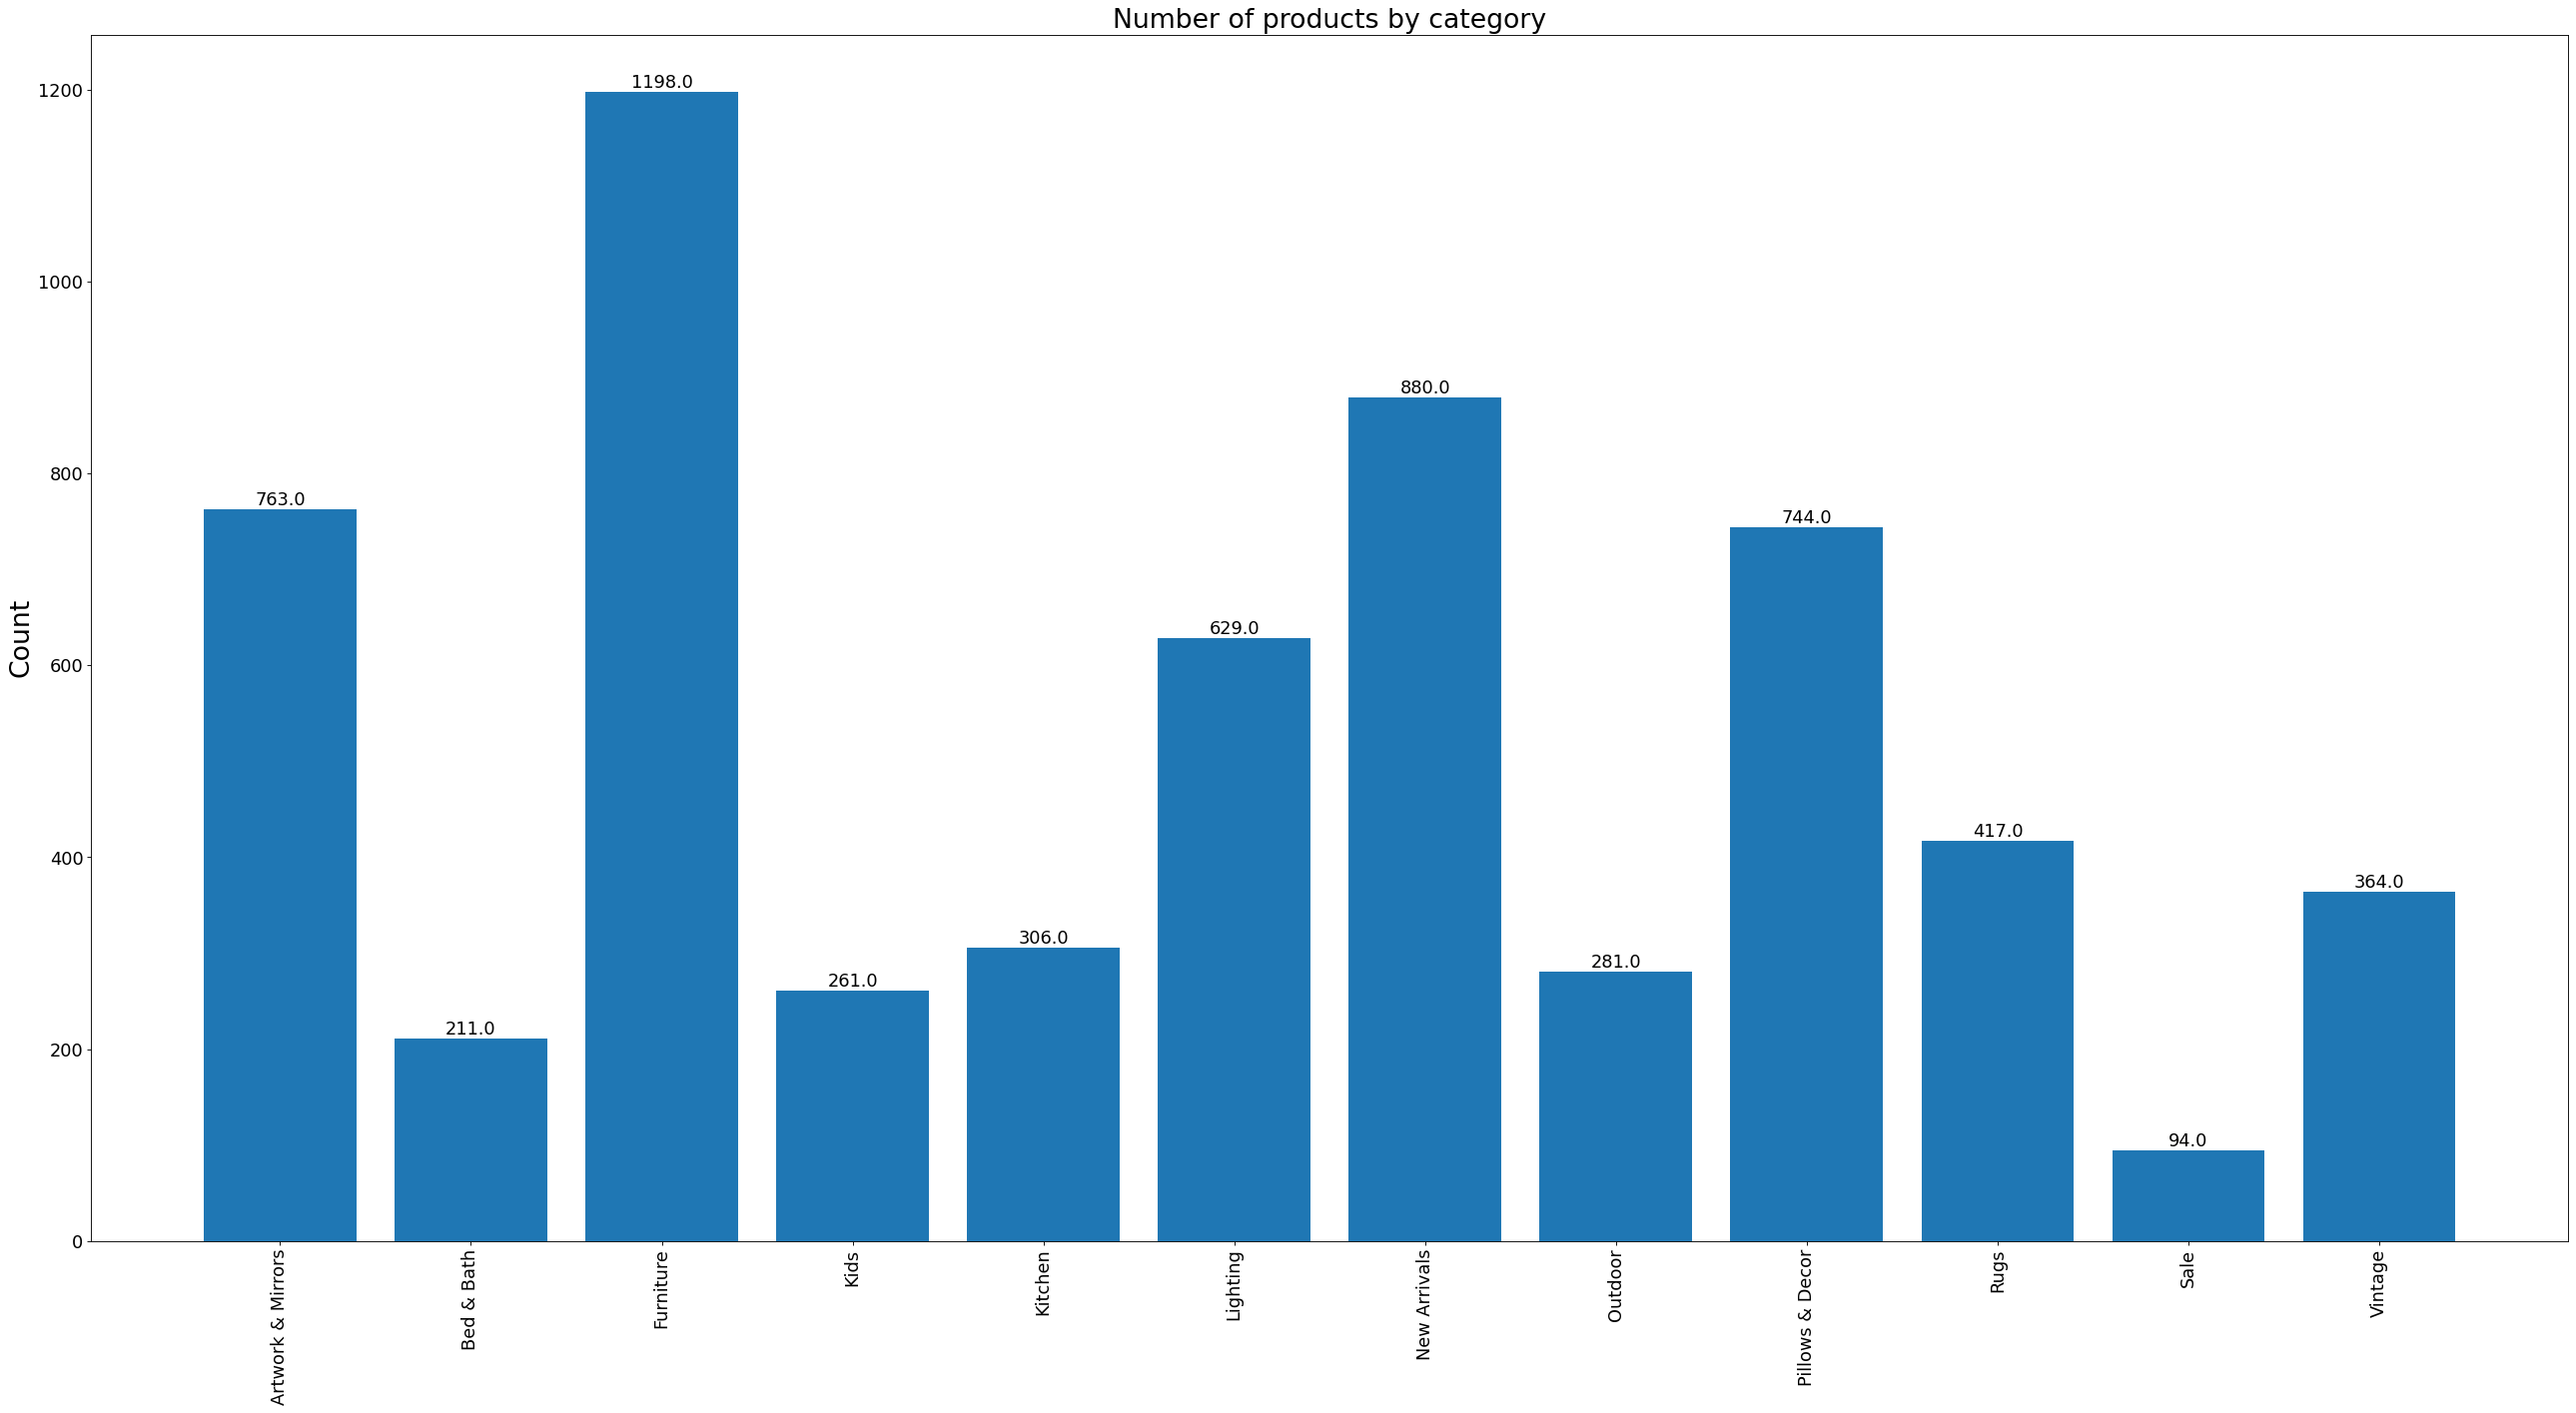

In [52]:
df = category_df.size().reset_index(name="counts")
c = df["counts"]
plot_bar(df["category"], df["counts"])
plt.title("Number of products by category", fontsize=24)

Text(0.5, 1.0, 'Number of products by subcategory')

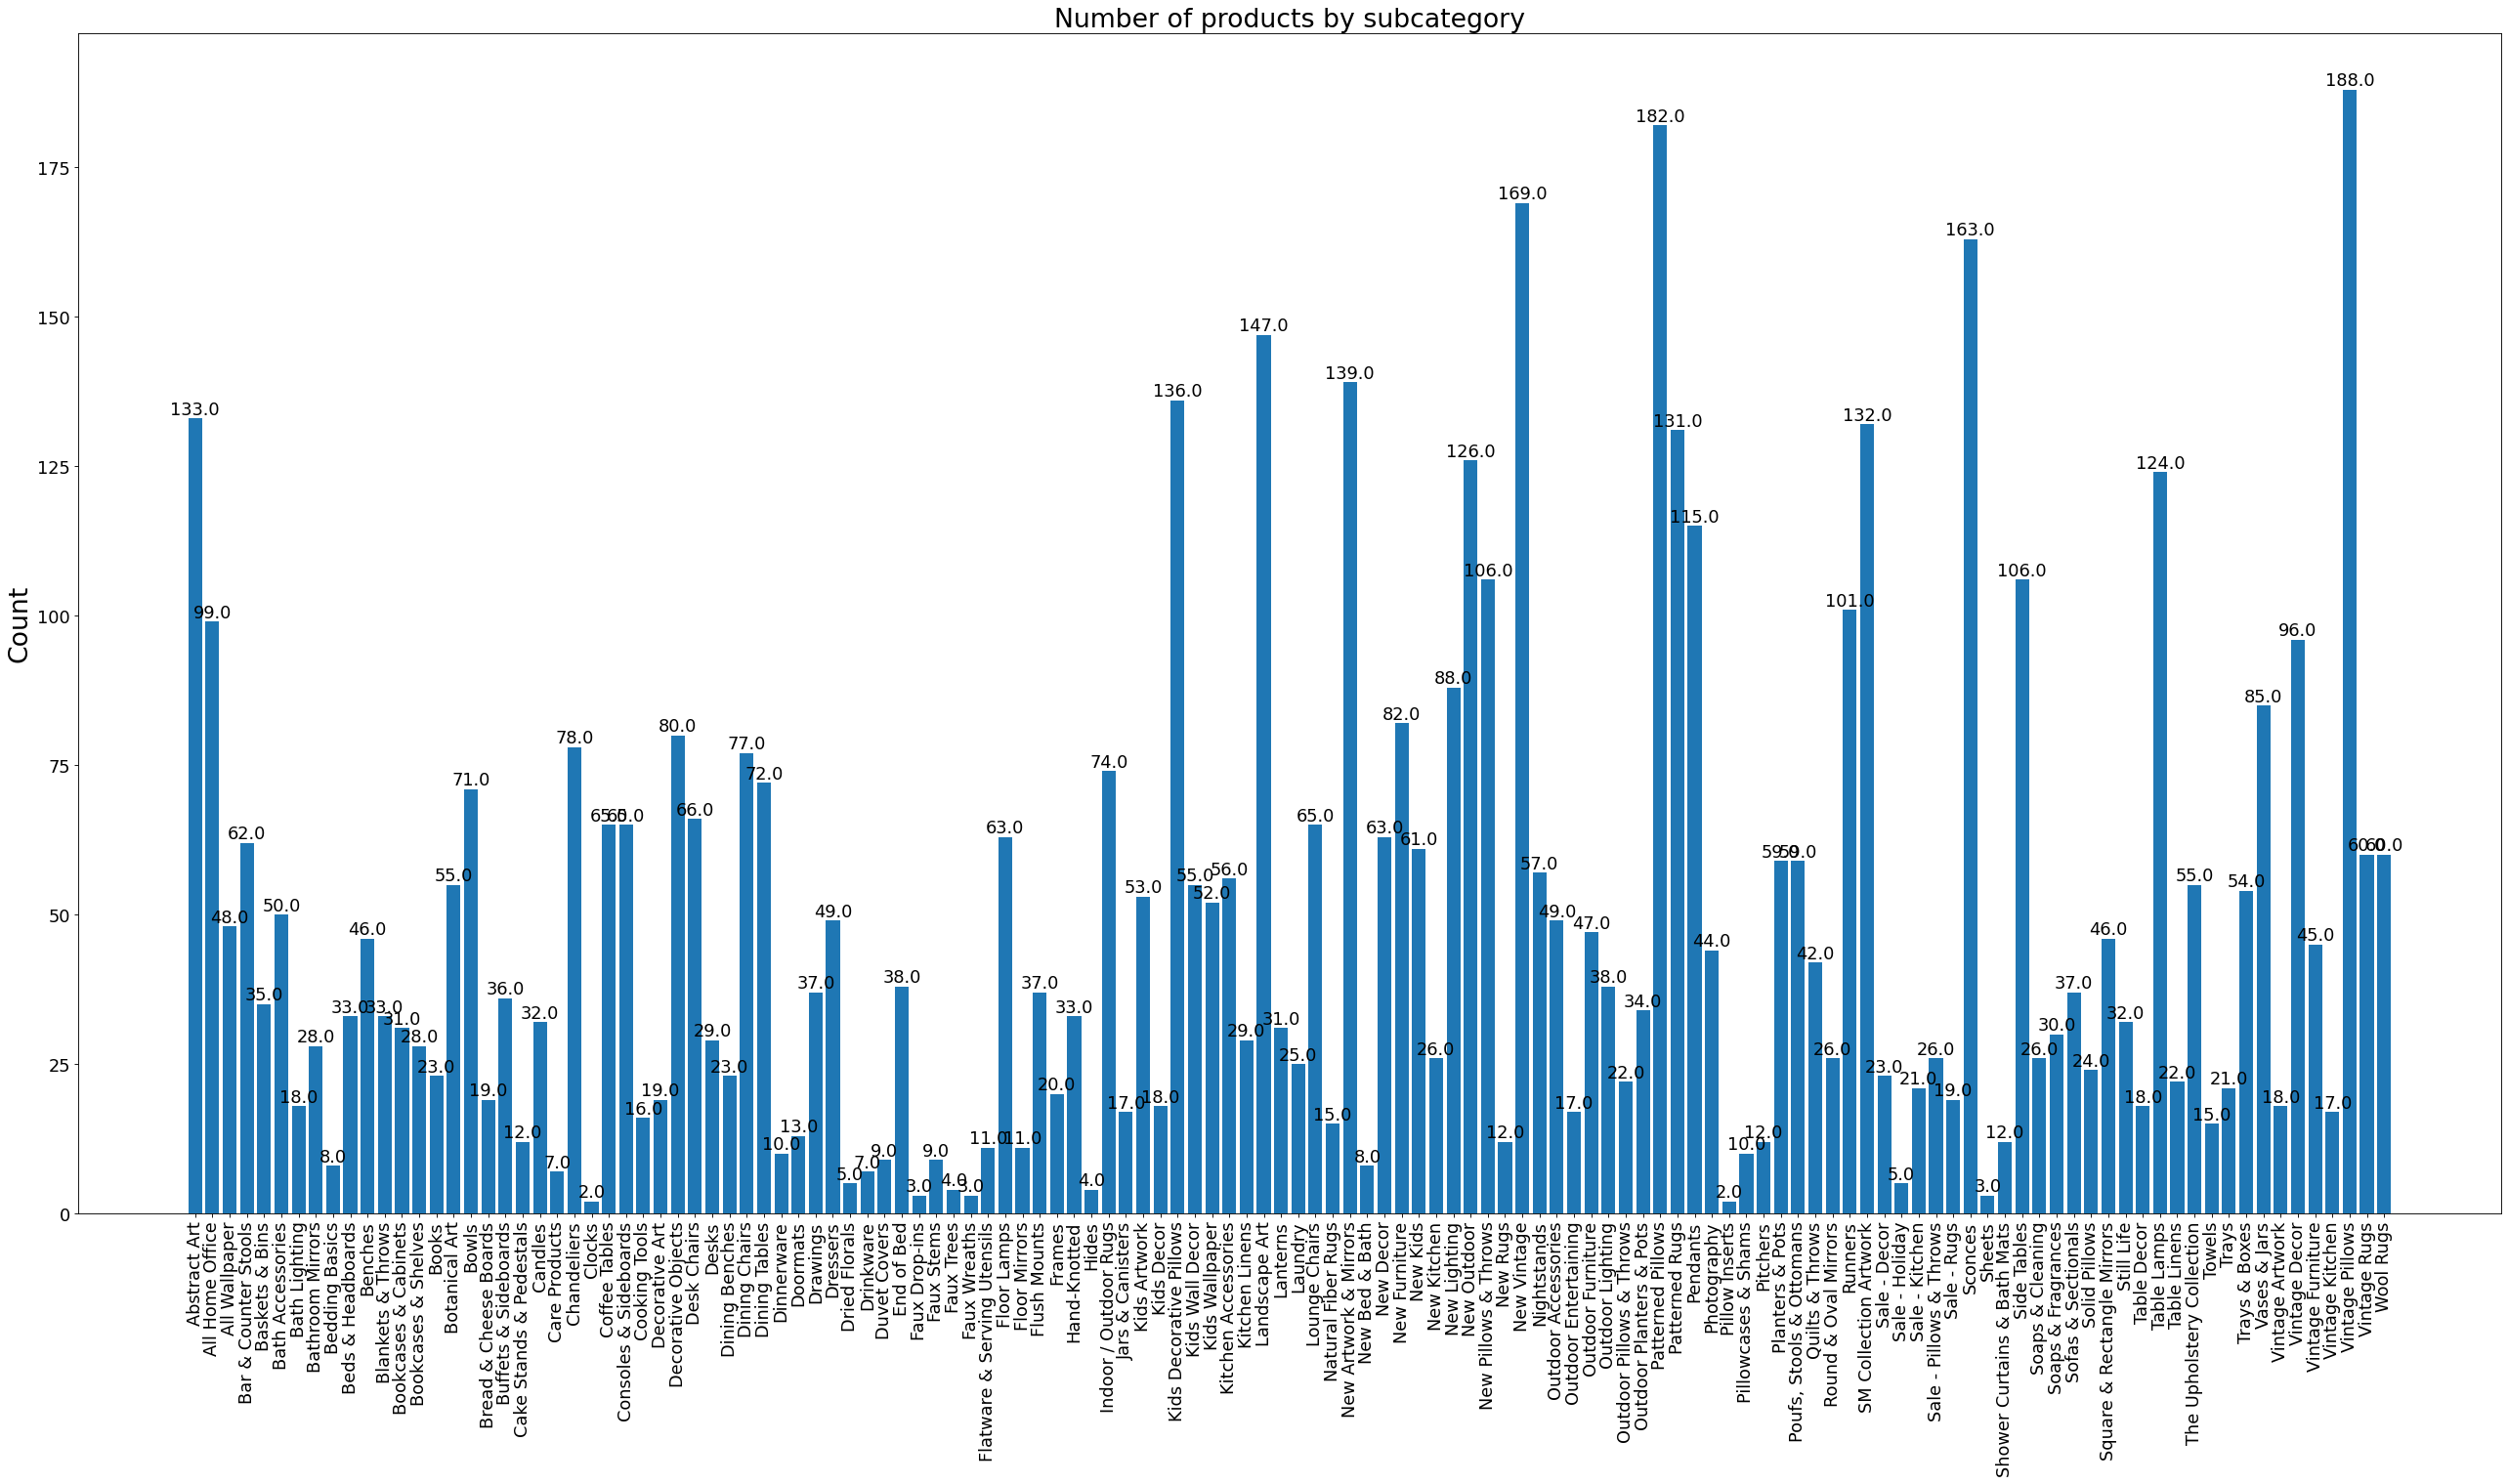

In [53]:
df = subcategory_df.size().reset_index(name="counts")
c = df["counts"]
plot_bar(df["subcategory"], df["counts"])
plt.title("Number of products by subcategory", fontsize=24)

Text(0.5, 1.0, 'Mean of products by category')

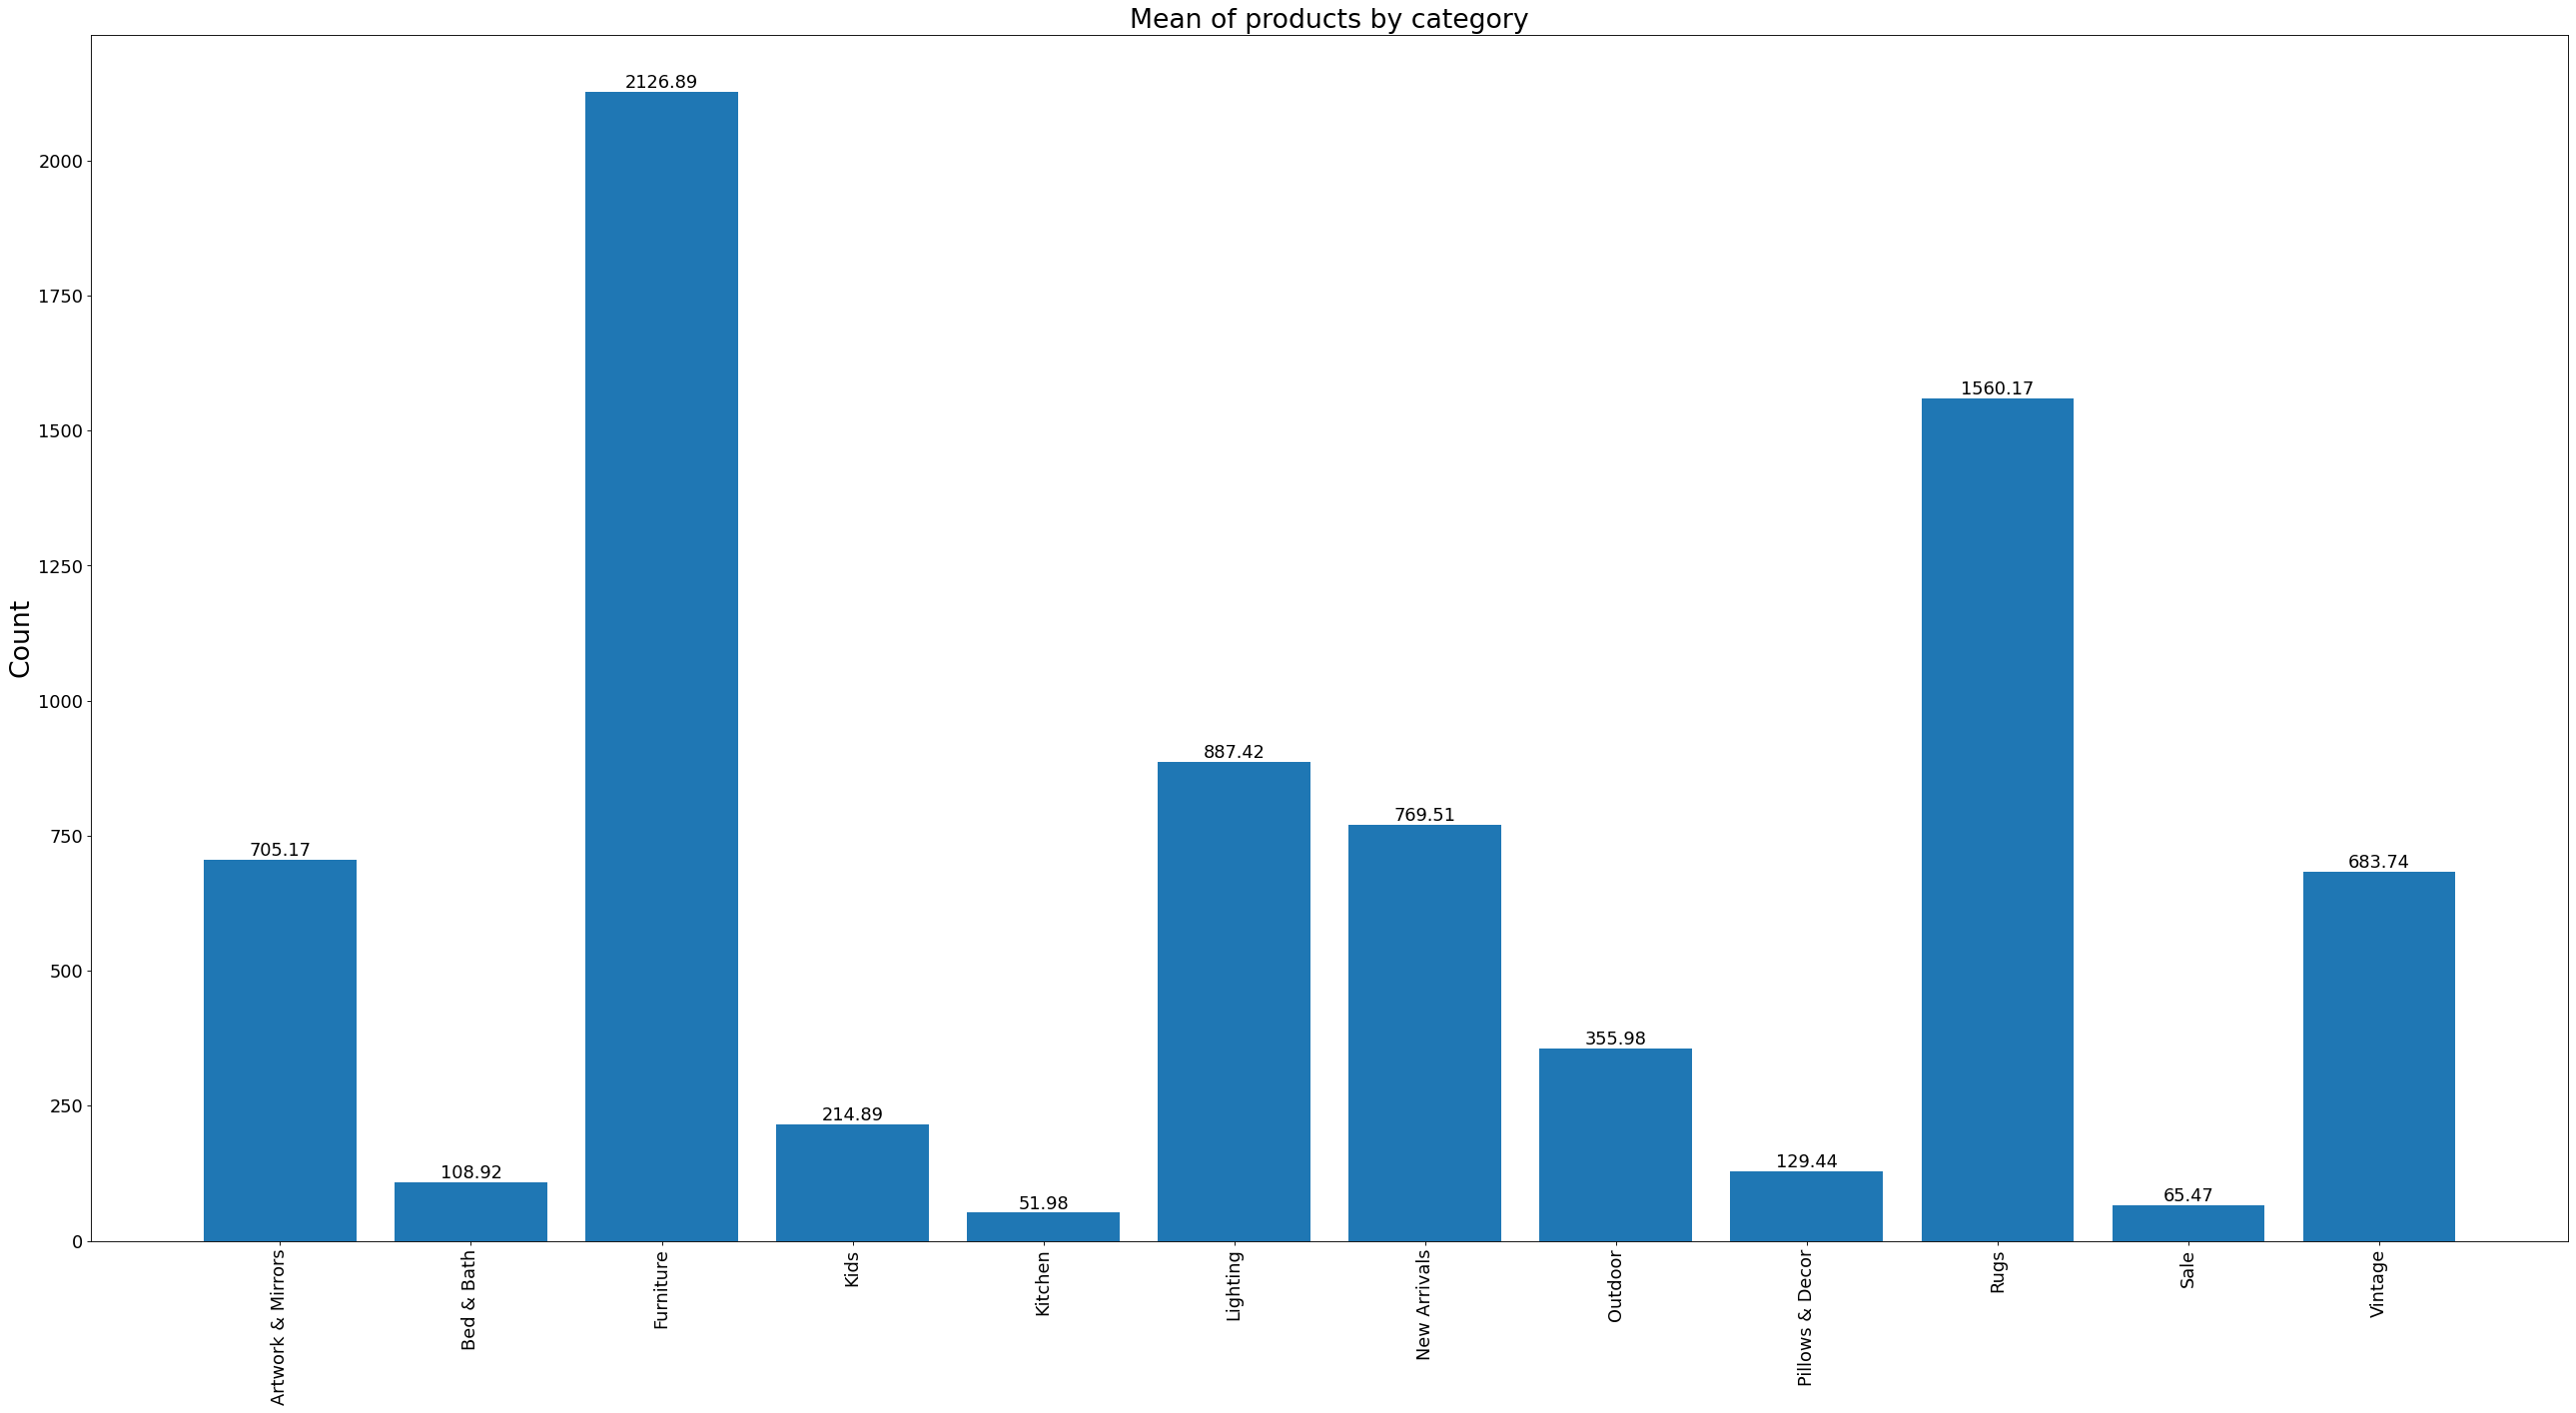

In [19]:
df = category_df.mean().reset_index()
c = df["price"].round(2)
plot_bar(df["category"], df["price"])
plt.title("Mean of products by category", fontsize=24)

Text(0.5, 1.0, 'Mean of products by subcategory')

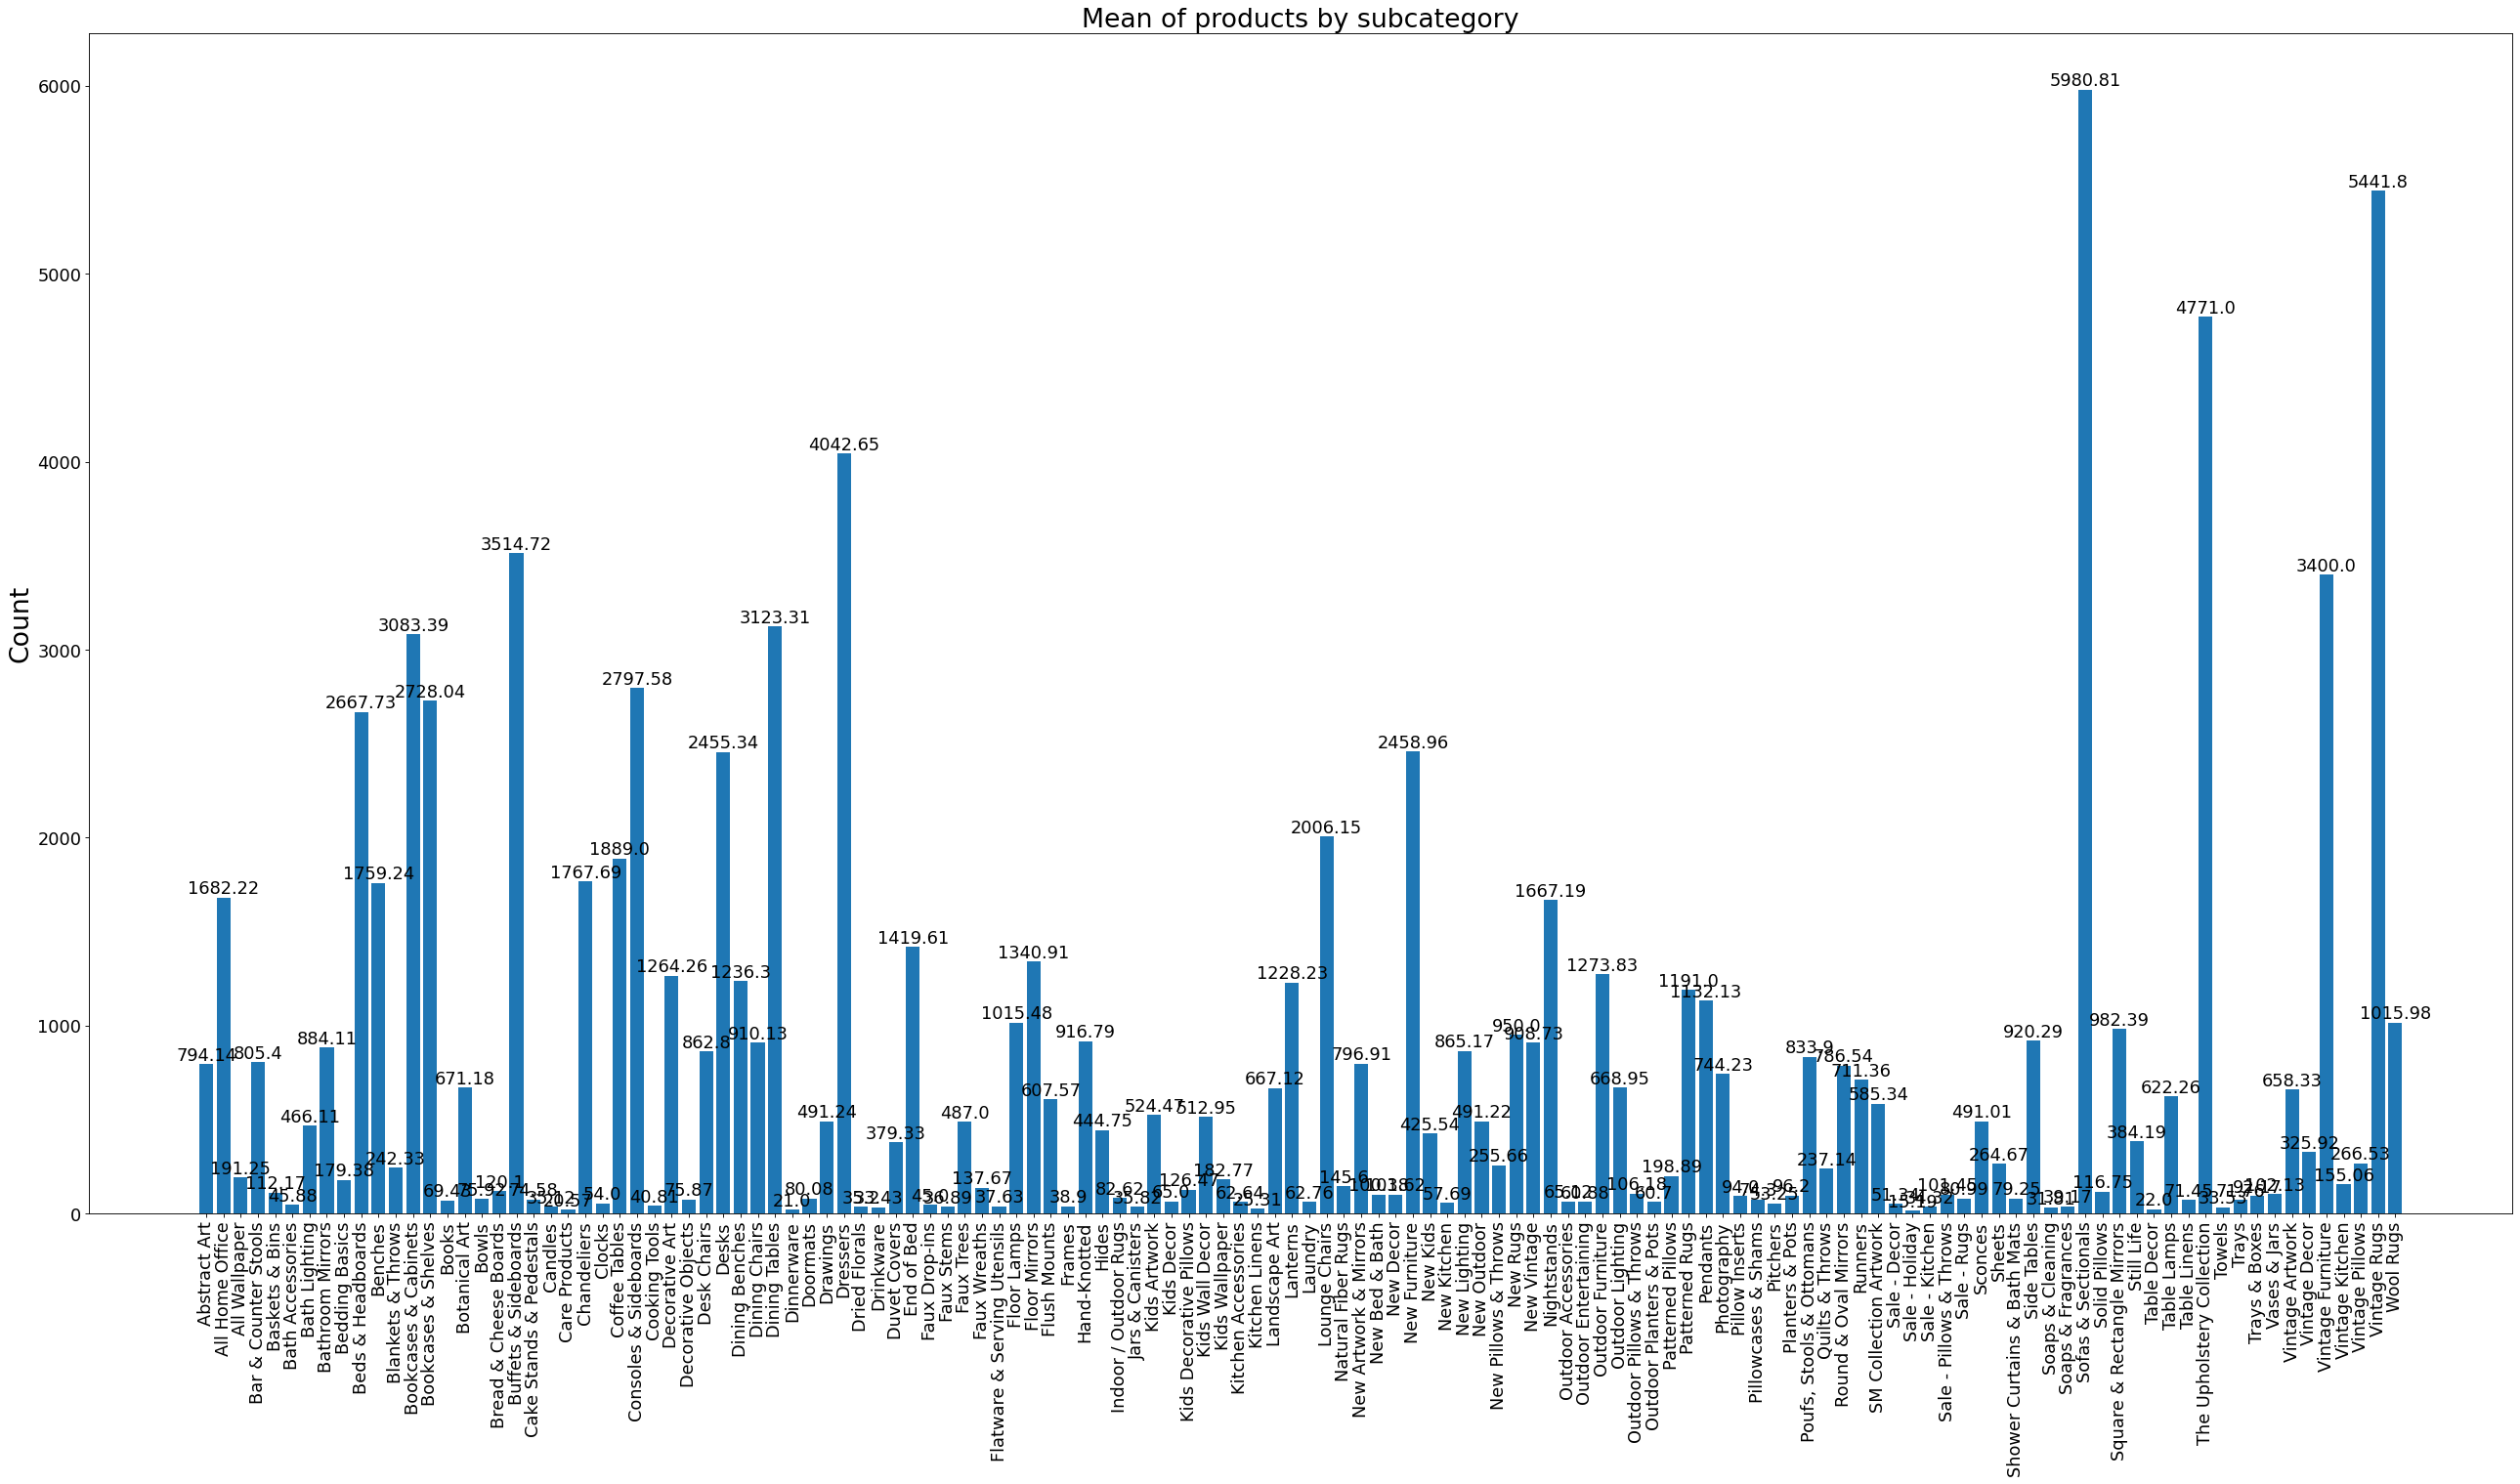

In [54]:
df = subcategory_df.mean().reset_index()
c = df["price"].round(2)
plot_bar(df["subcategory"], df["price"])
plt.title("Mean of products by subcategory", fontsize=24)

Text(0.5, 1.0, 'Median of products by category')

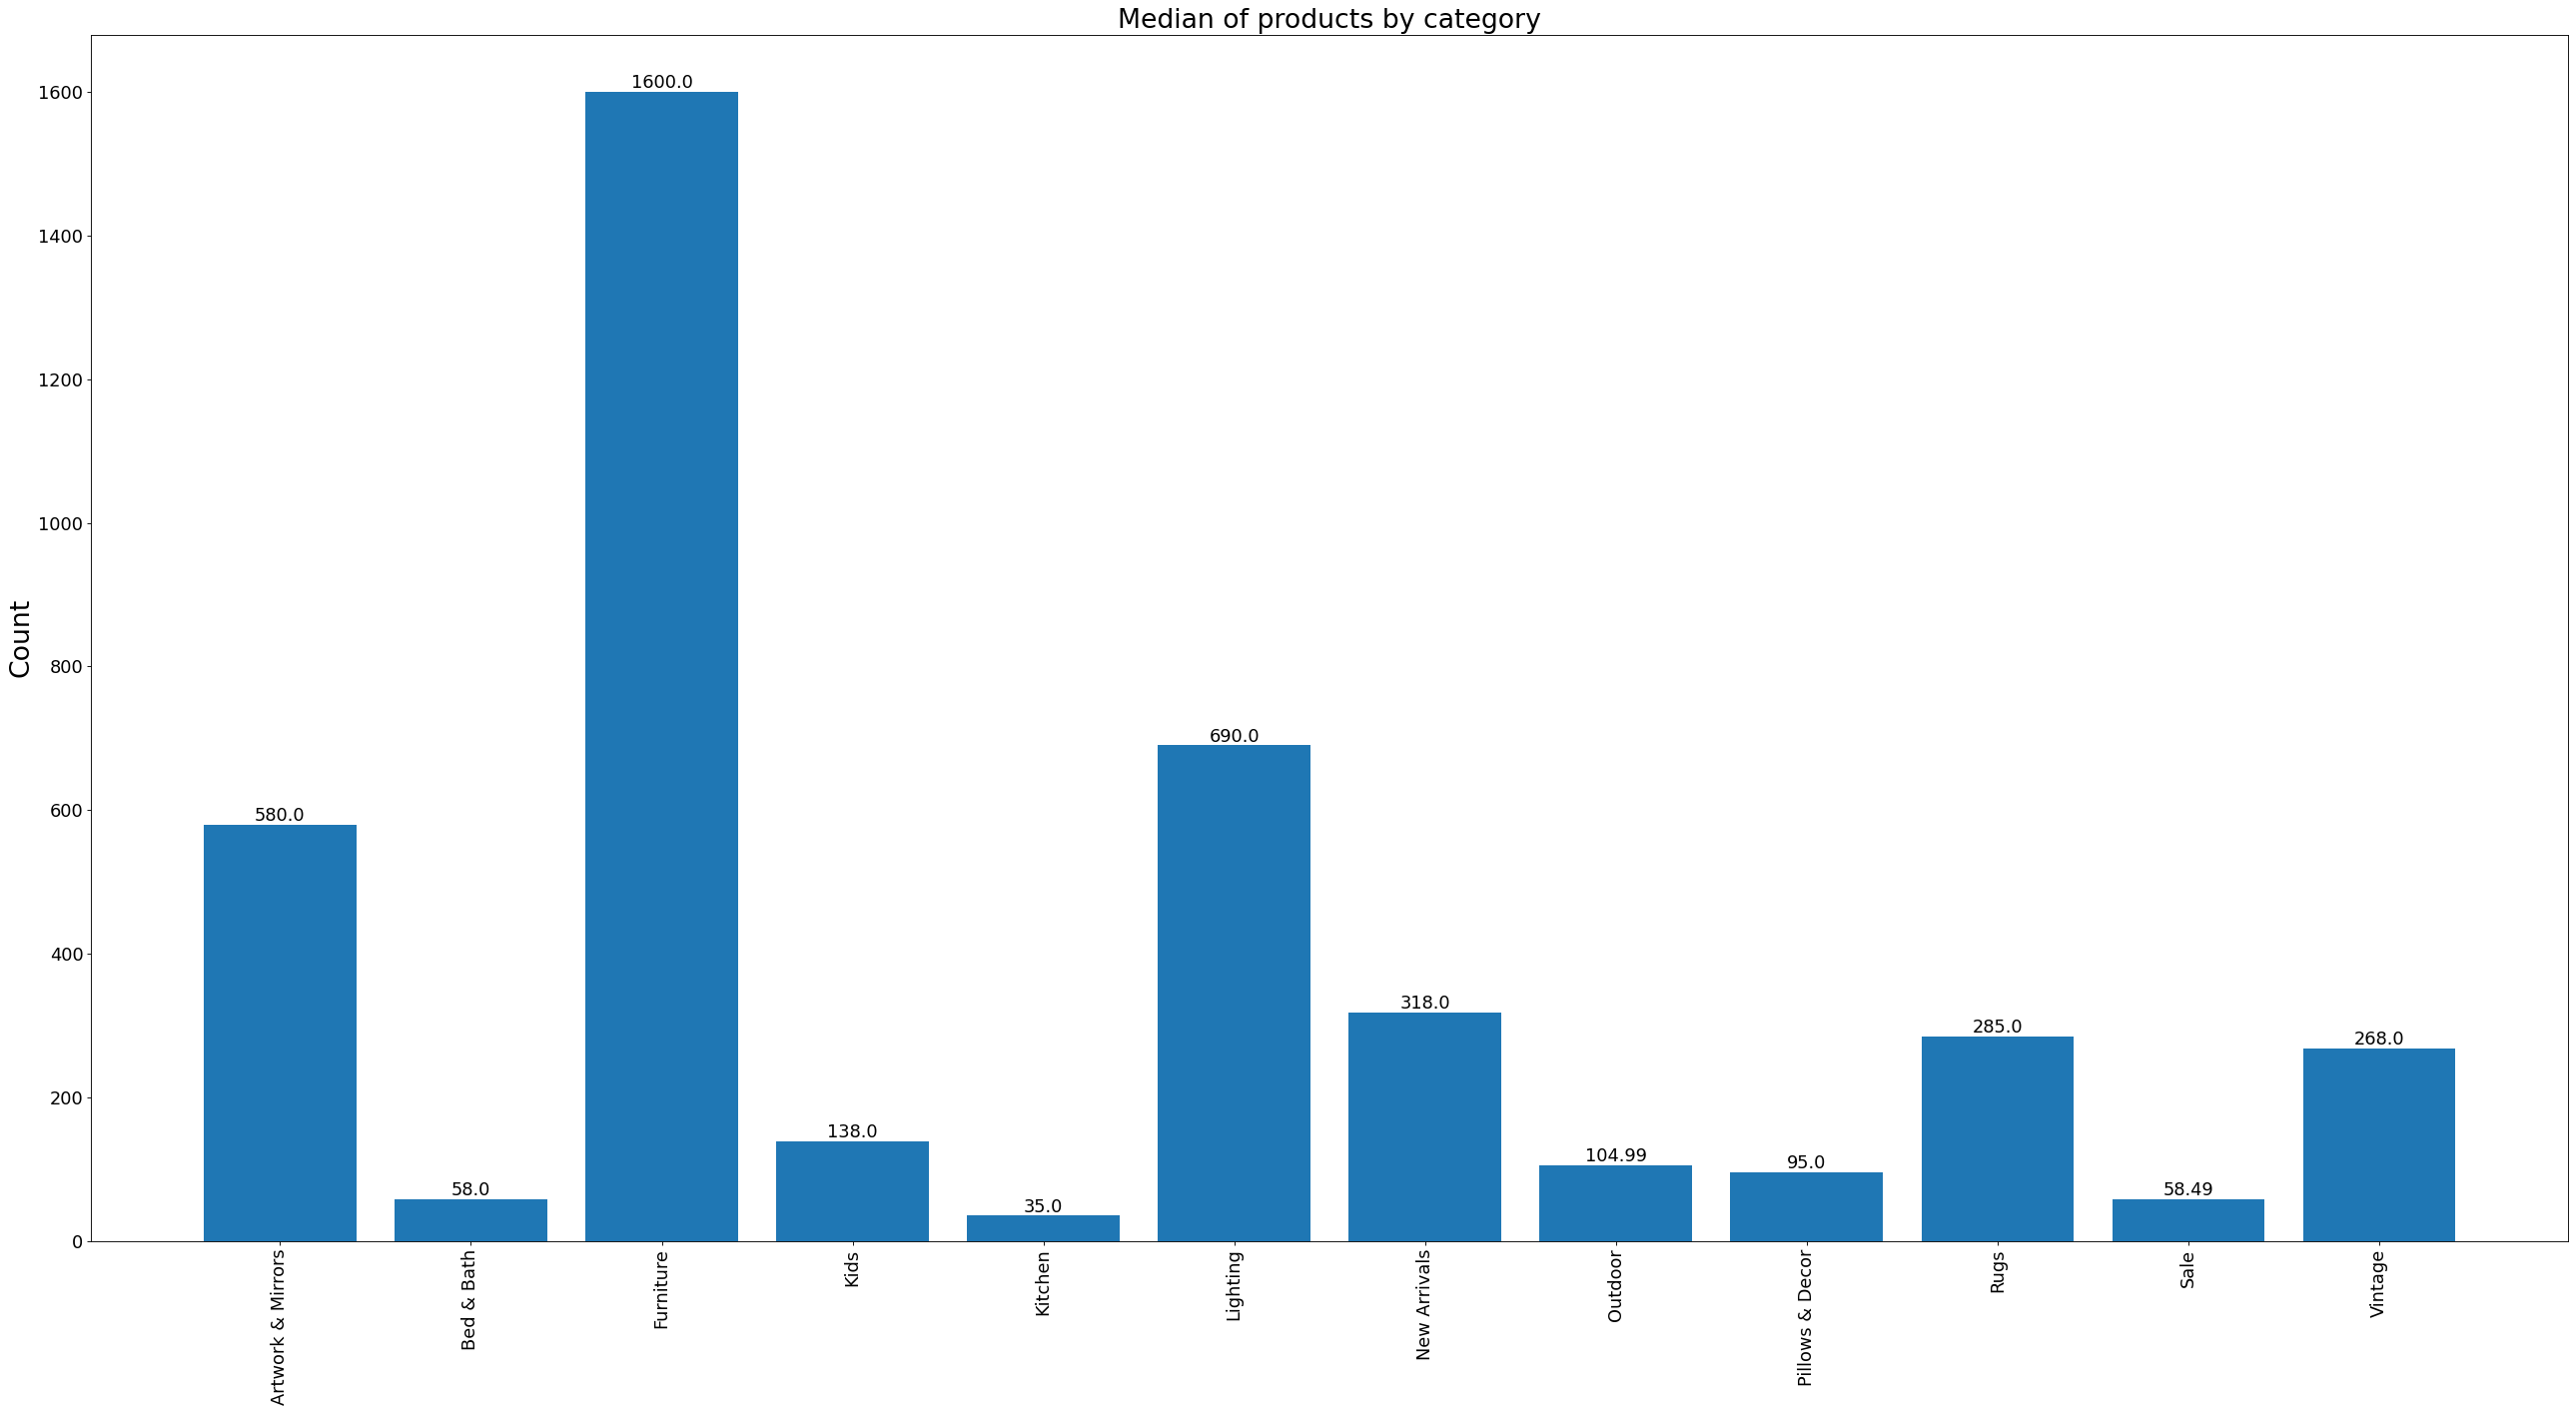

In [21]:
df = category_df.median().reset_index()
c = df["price"].round(2)
plot_bar(df["category"], df["price"])
plt.title("Median of products by category", fontsize=24)

Text(0.5, 1.0, 'Median of products by subcategory')

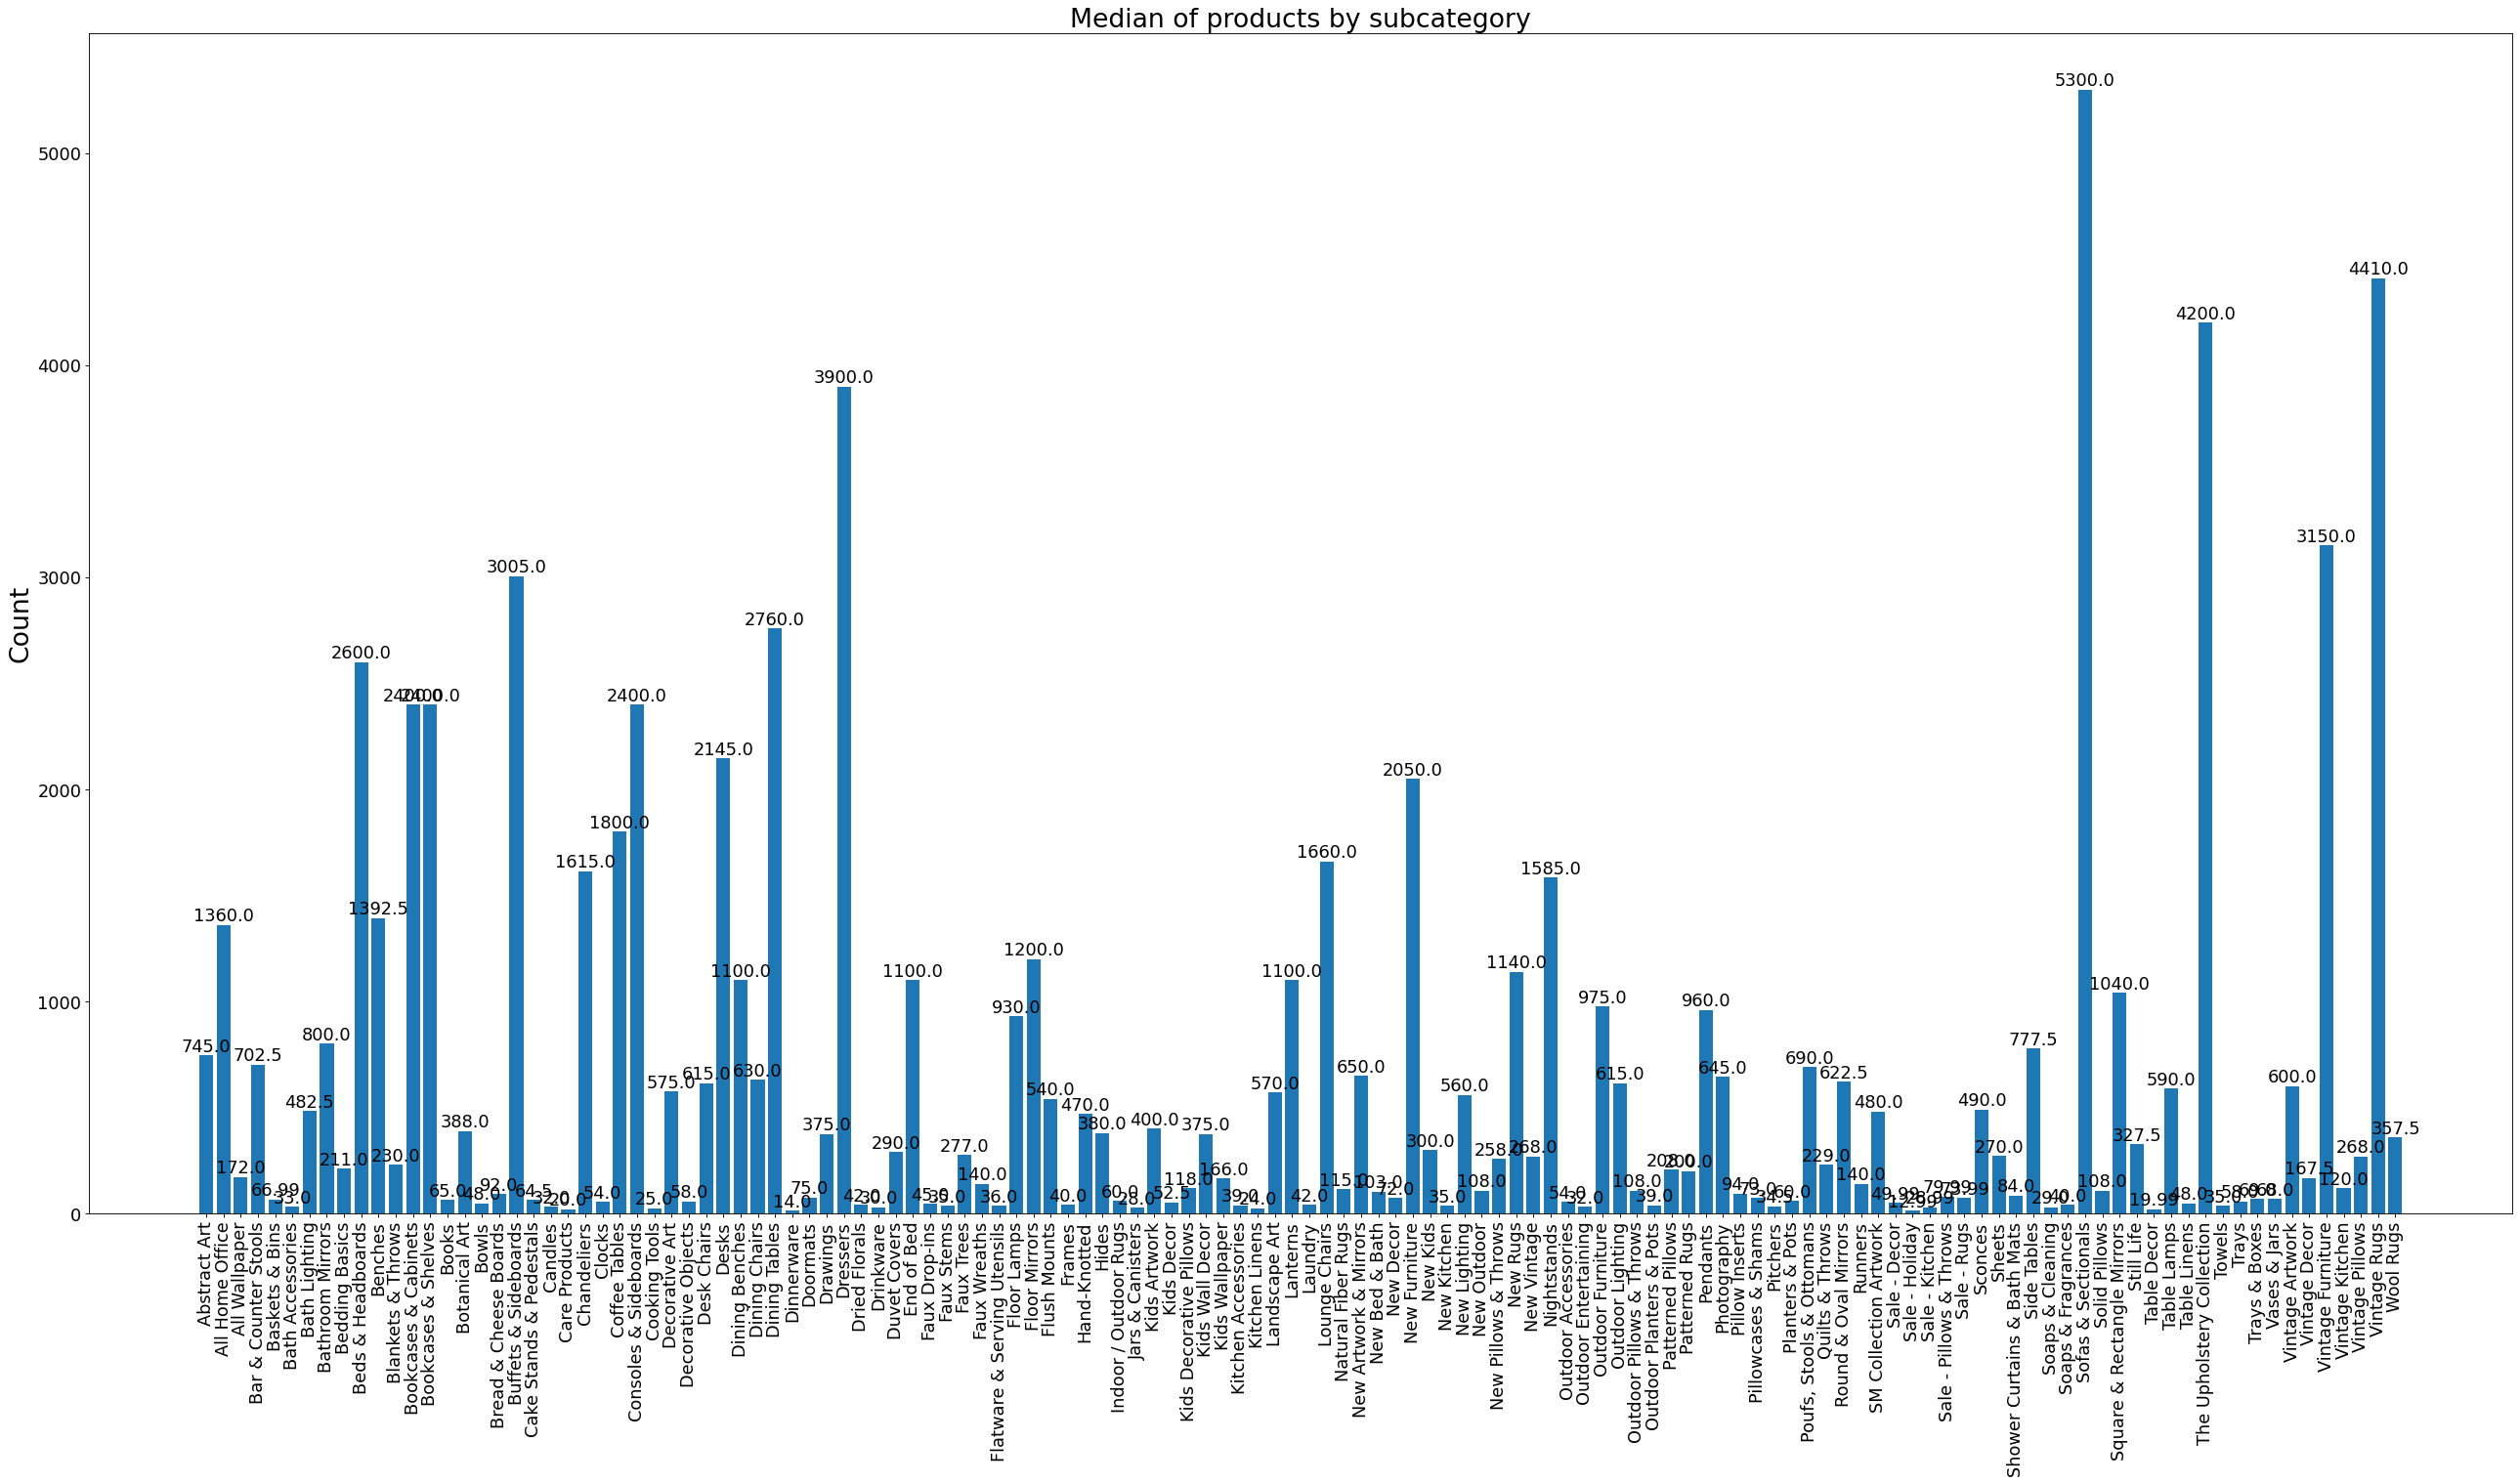

In [55]:
df = subcategory_df.median().reset_index()
c = df["price"].round(2)
plot_bar(df["subcategory"], df["price"])
plt.title("Median of products by subcategory", fontsize=24)

In [23]:
purchase_no = dataset[dataset["purchase_opportunity"] == "No"]

Text(0.5, 1.0, 'Count of products by category wich is not available for purchase')

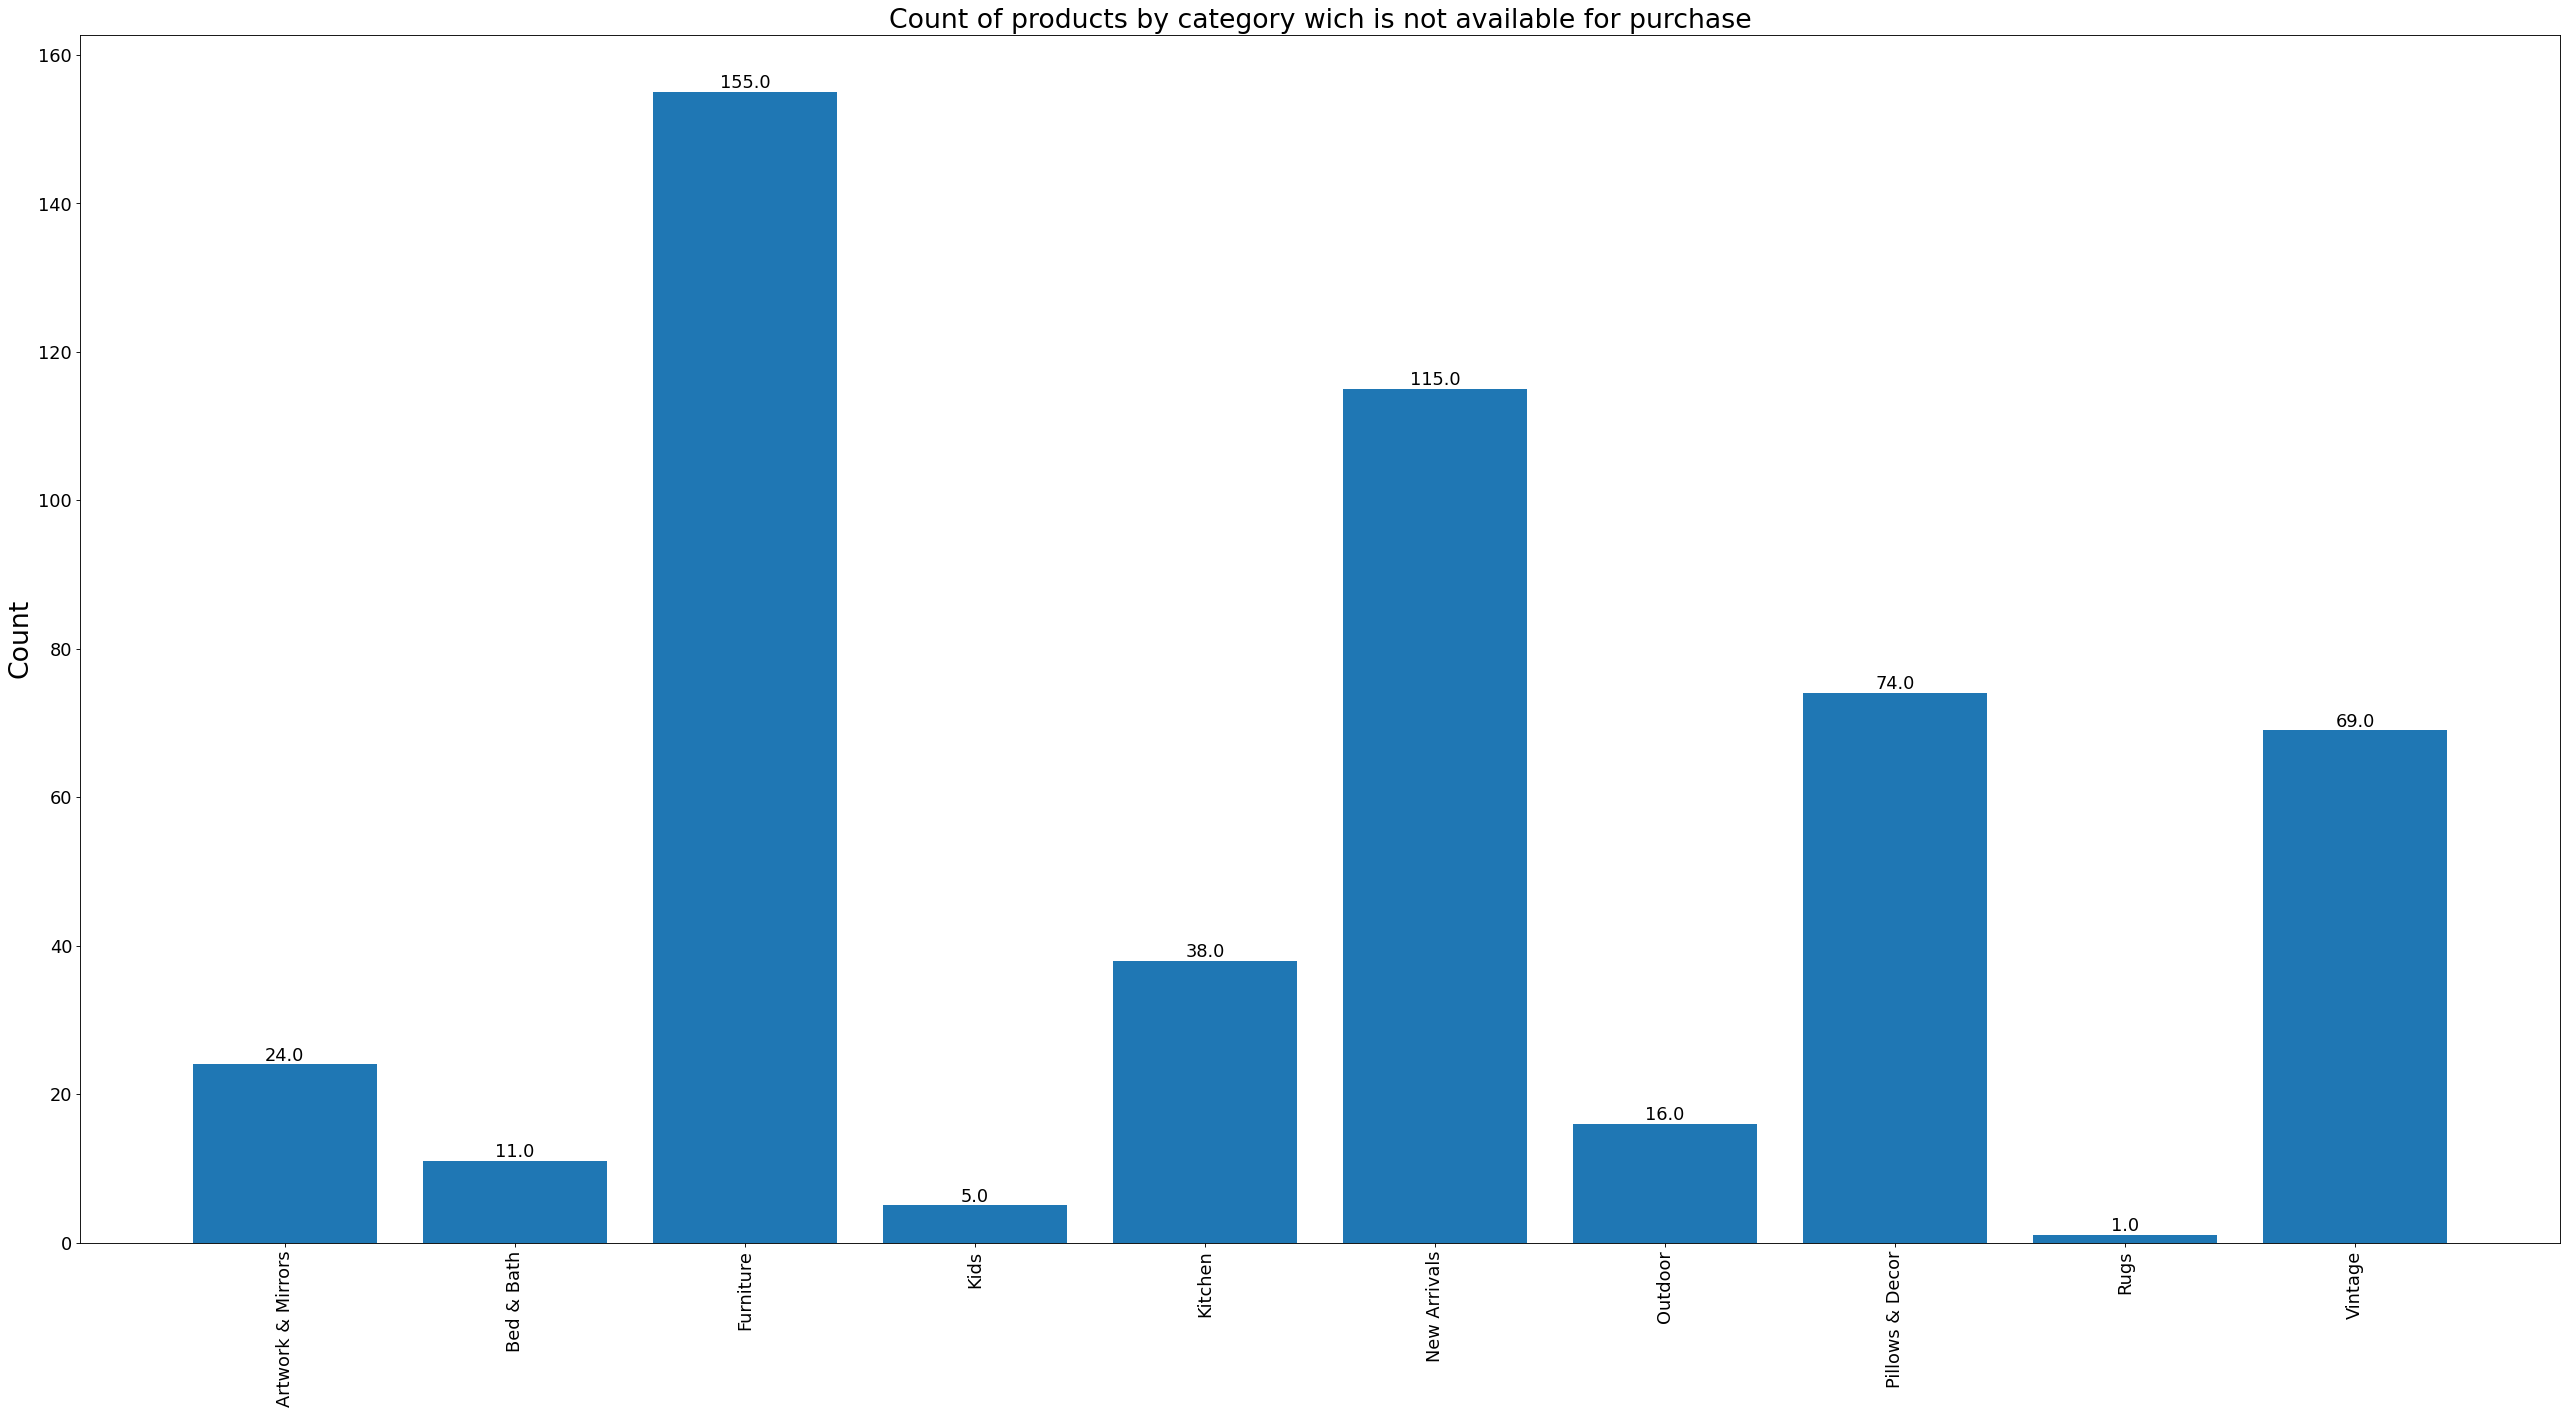

In [56]:
df = purchase_no.groupby("category").size().reset_index(name="counts")
c = df["counts"]
plot_bar(df["category"], df["counts"])
plt.title("Count of products by category wich is not available for purchase", fontsize=24)

Text(0.5, 1.0, 'Count of products by subcategory wich is not available for purchase')

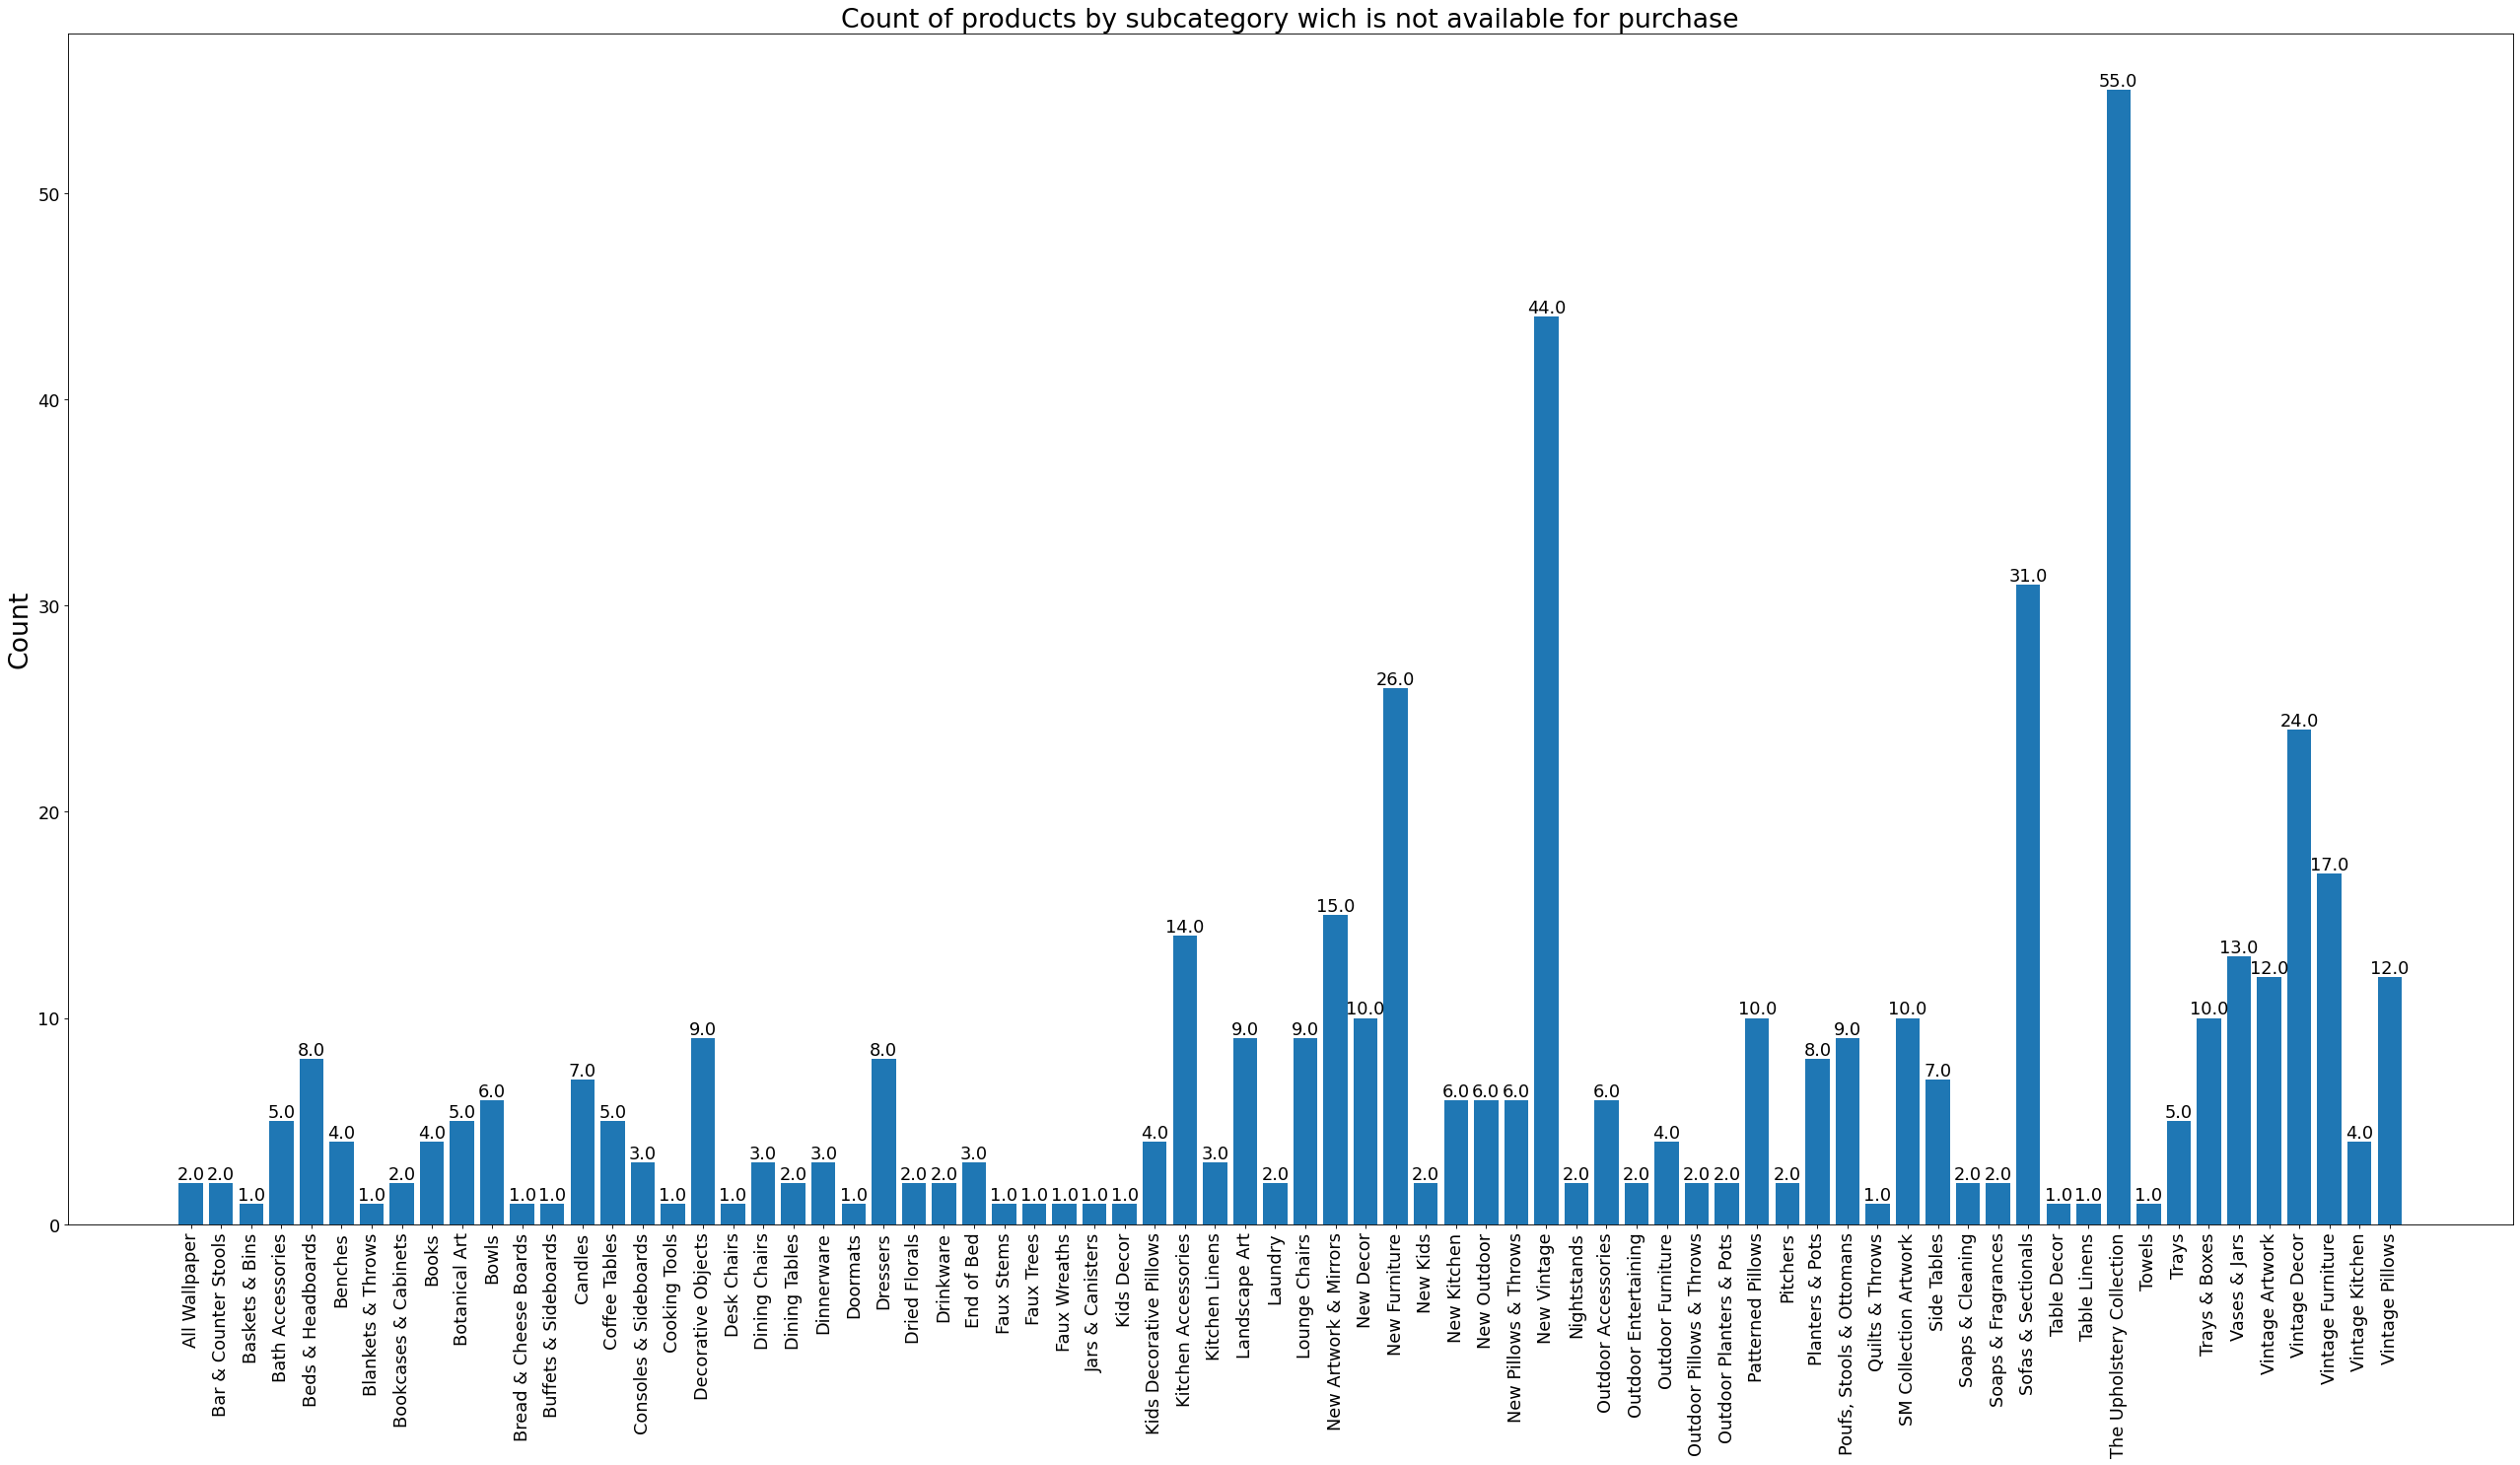

In [57]:
df = purchase_no.groupby("subcategory").size().reset_index(name="counts")
c = df["counts"]
plot_bar(df["subcategory"], df["counts"])
plt.title("Count of products by subcategory wich is not available for purchase", fontsize=24)

In [58]:
date_picker = "2021-05-01"
date_condition = dataset[dataset["created_at"] < date_picker]

Text(0.5, 1.0, 'Count of products by category wich exist on the 2021-05-01')

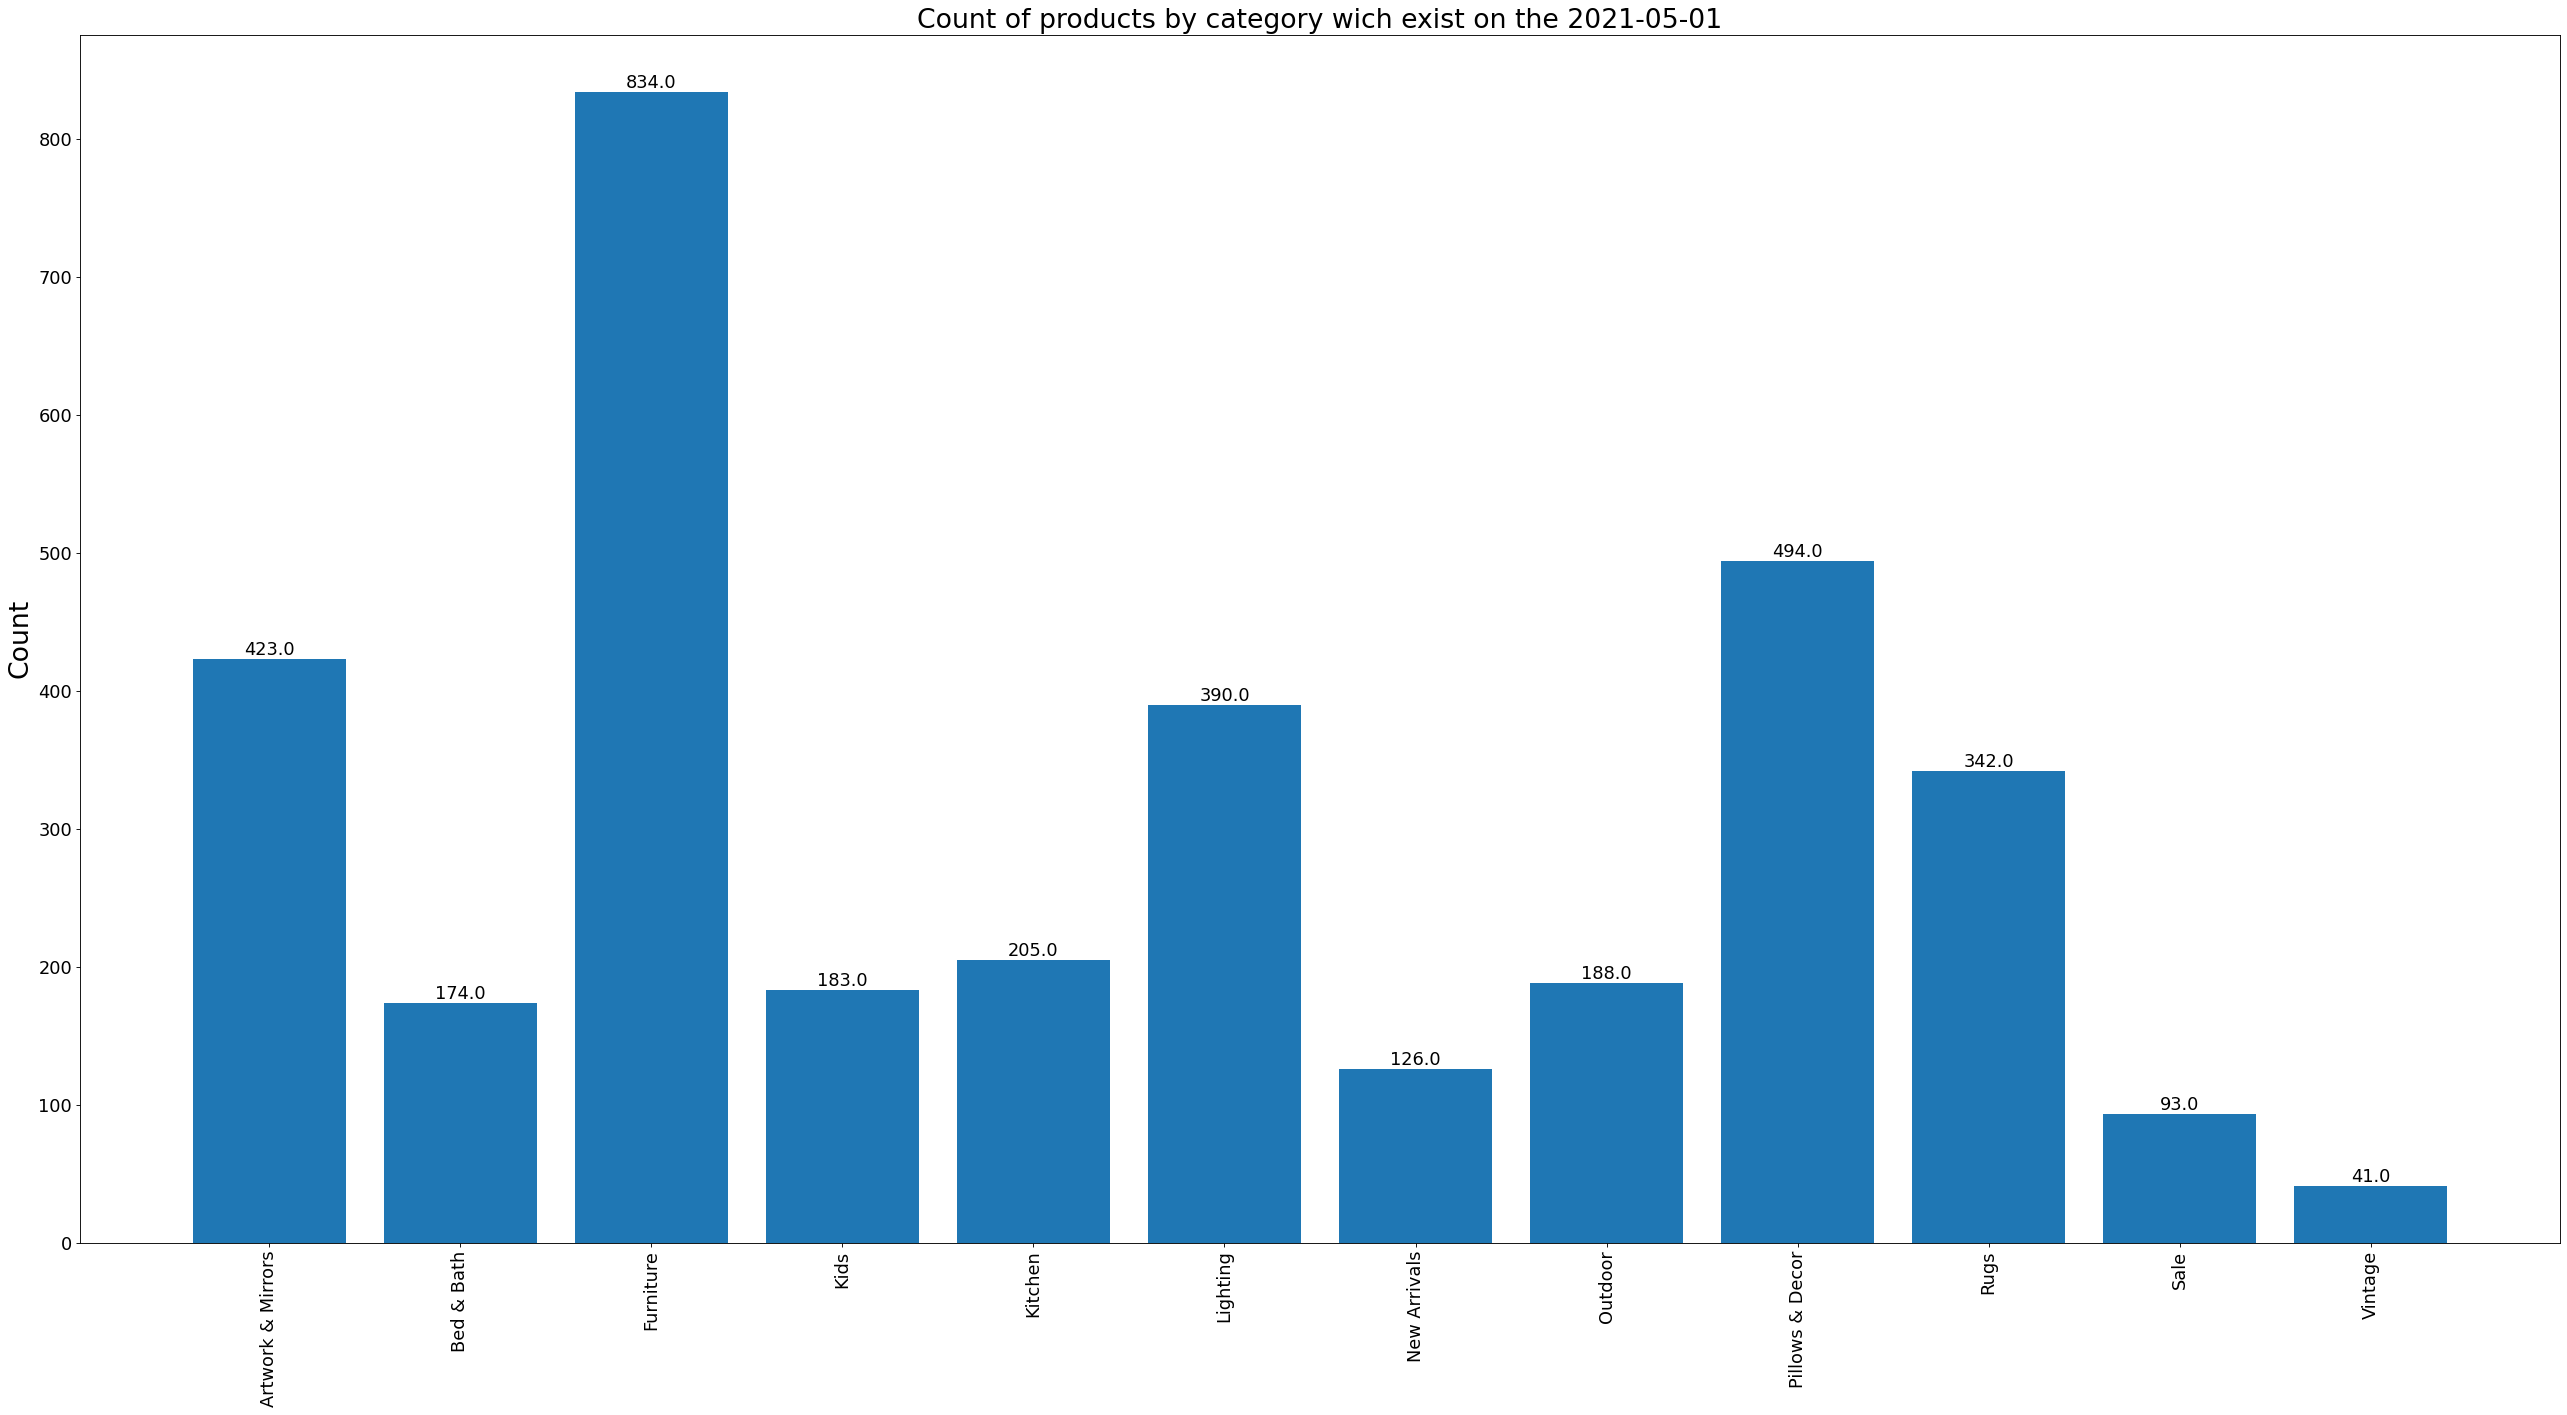

In [59]:
df = date_condition.groupby("category").size().reset_index(name="counts")
c = df["counts"]
plot_bar(df["category"], df["counts"])
plt.title(f"Count of products by category wich exist on the {date_picker}", fontsize=24)

Text(0.5, 1.0, 'Count of products by subcategory wich exist on the 2021-05-01')

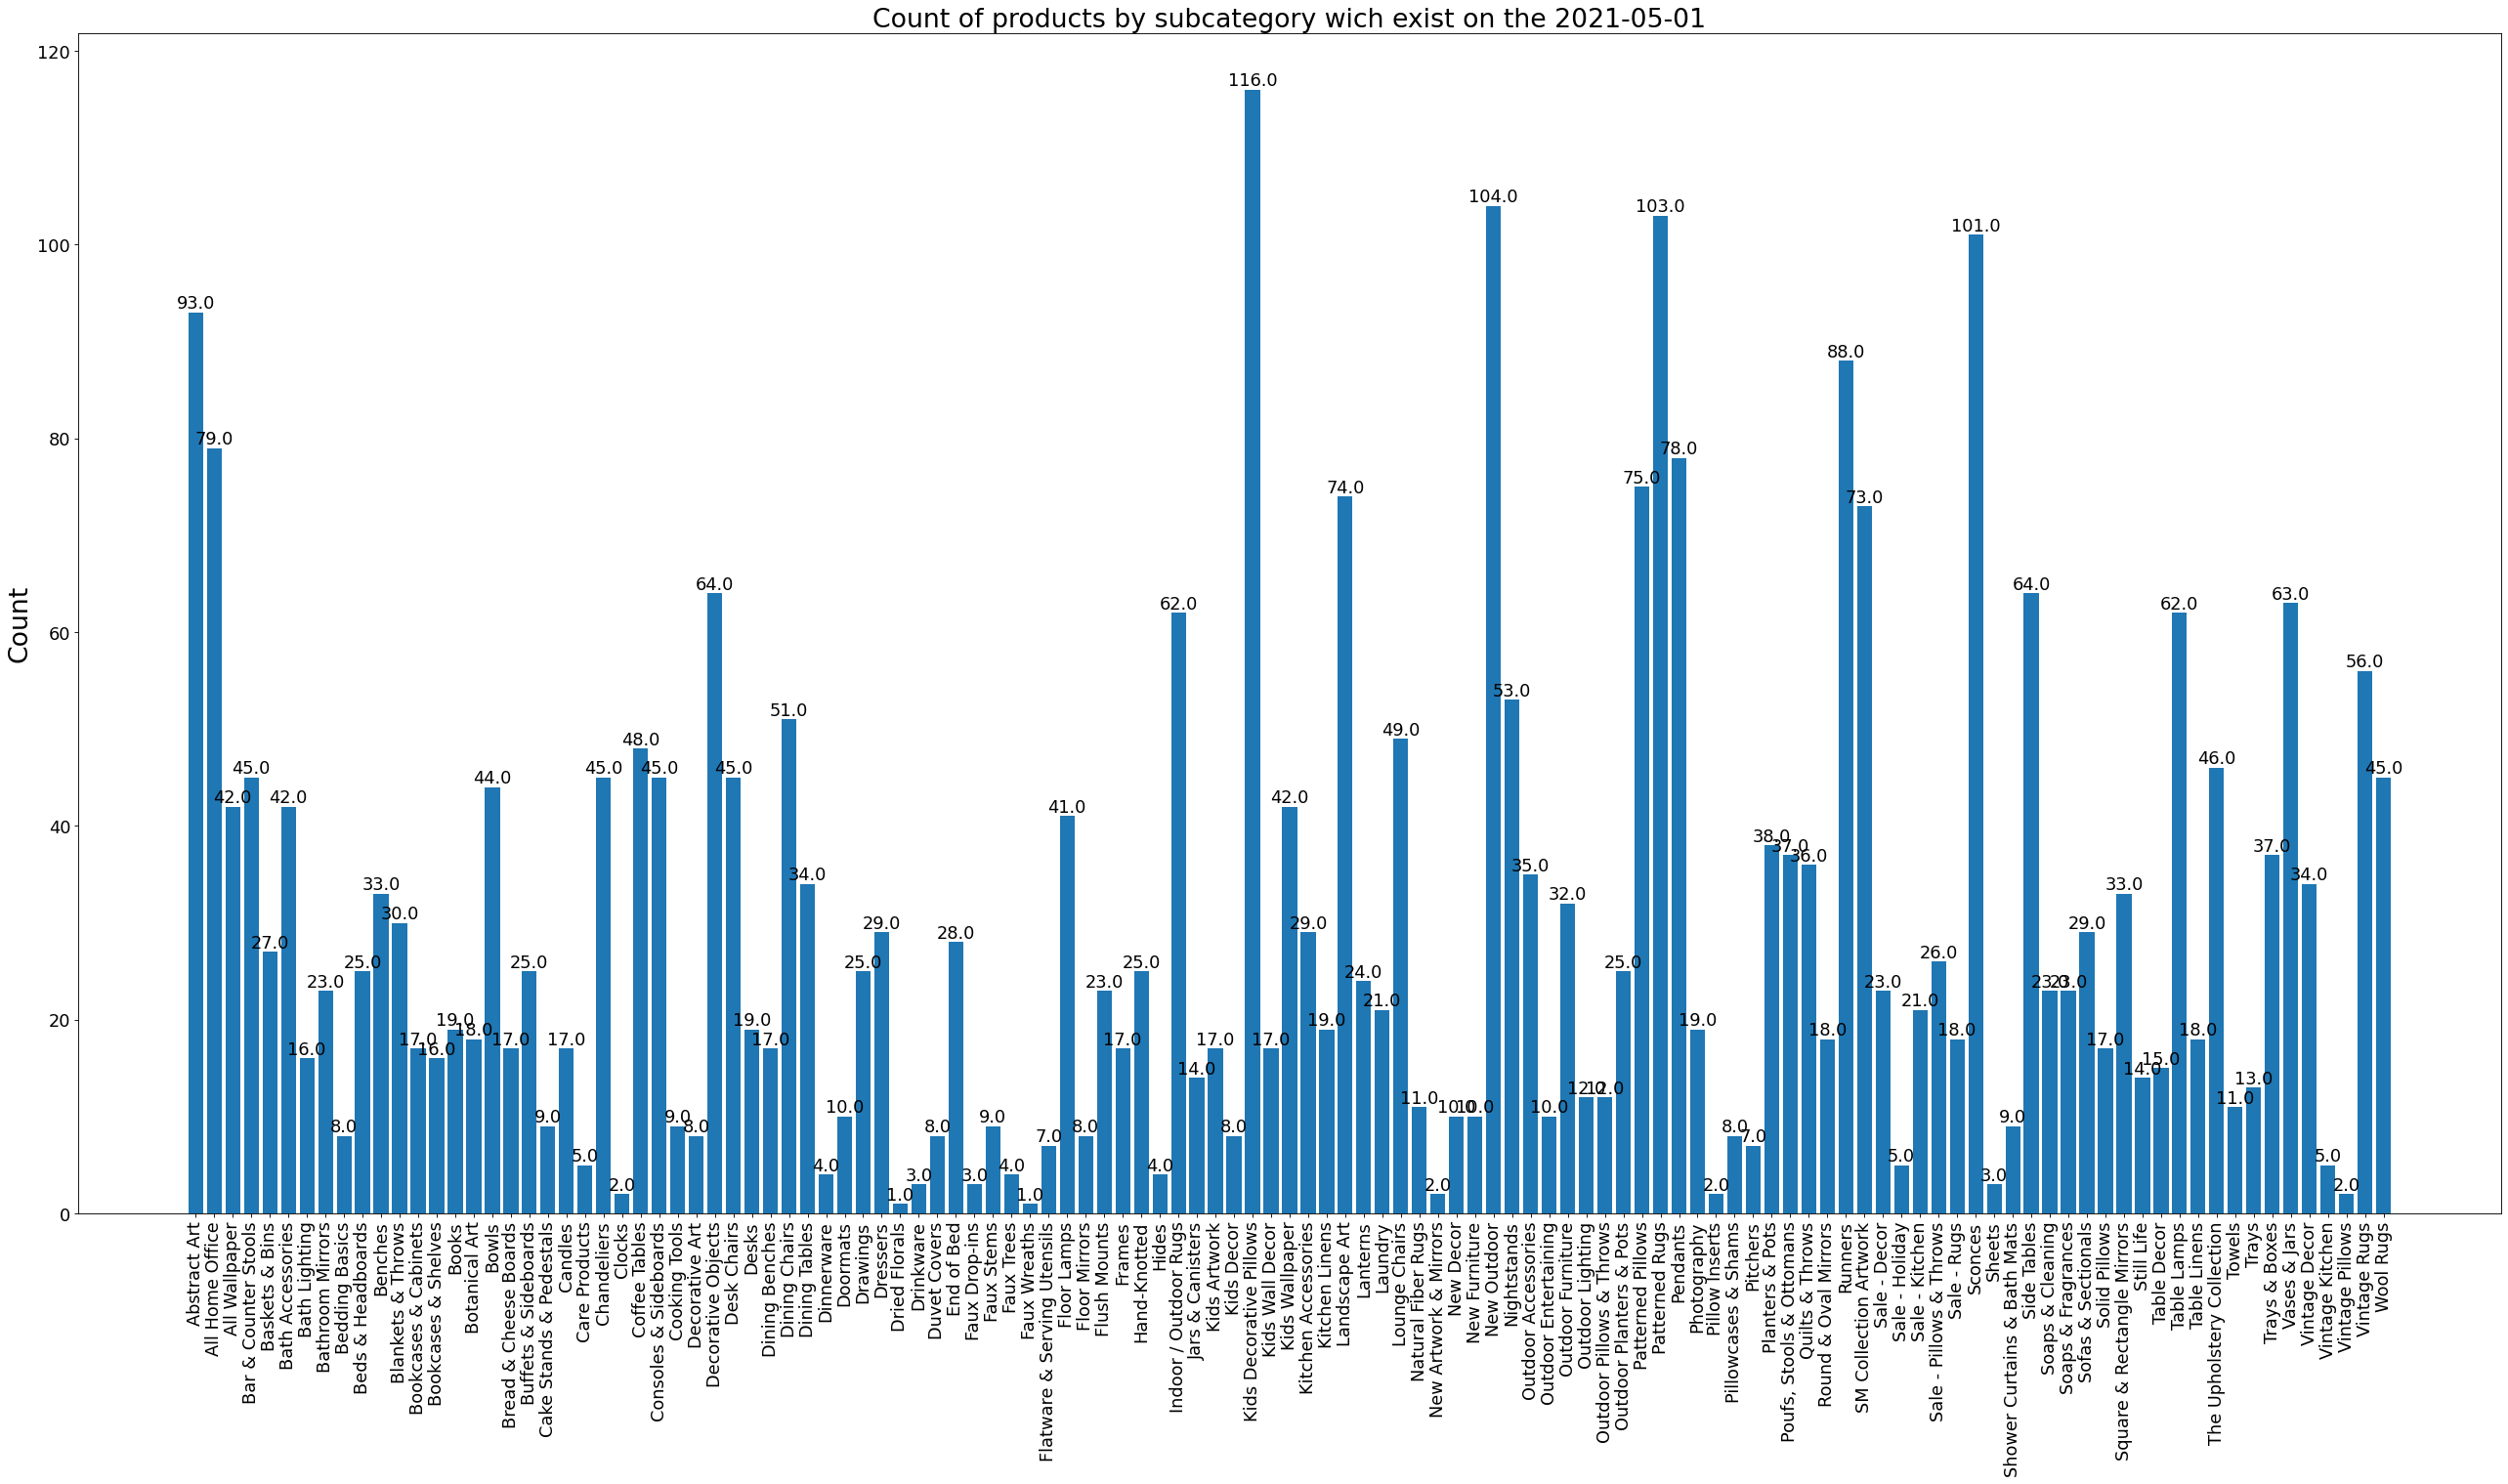

In [60]:
df = date_condition.groupby("subcategory").size().reset_index(name="counts")
c = df["counts"]
plot_bar(df["subcategory"], df["counts"])
plt.title(f"Count of products by subcategory wich exist on the {date_picker}", fontsize=24)

In [61]:
purchase_yes = dataset[(dataset["purchase_opportunity"] != "No") & (dataset["created_at"] < date_picker)]

Text(0.5, 1.0, 'Count of products by category wich possible to order on the 2021-05-01')

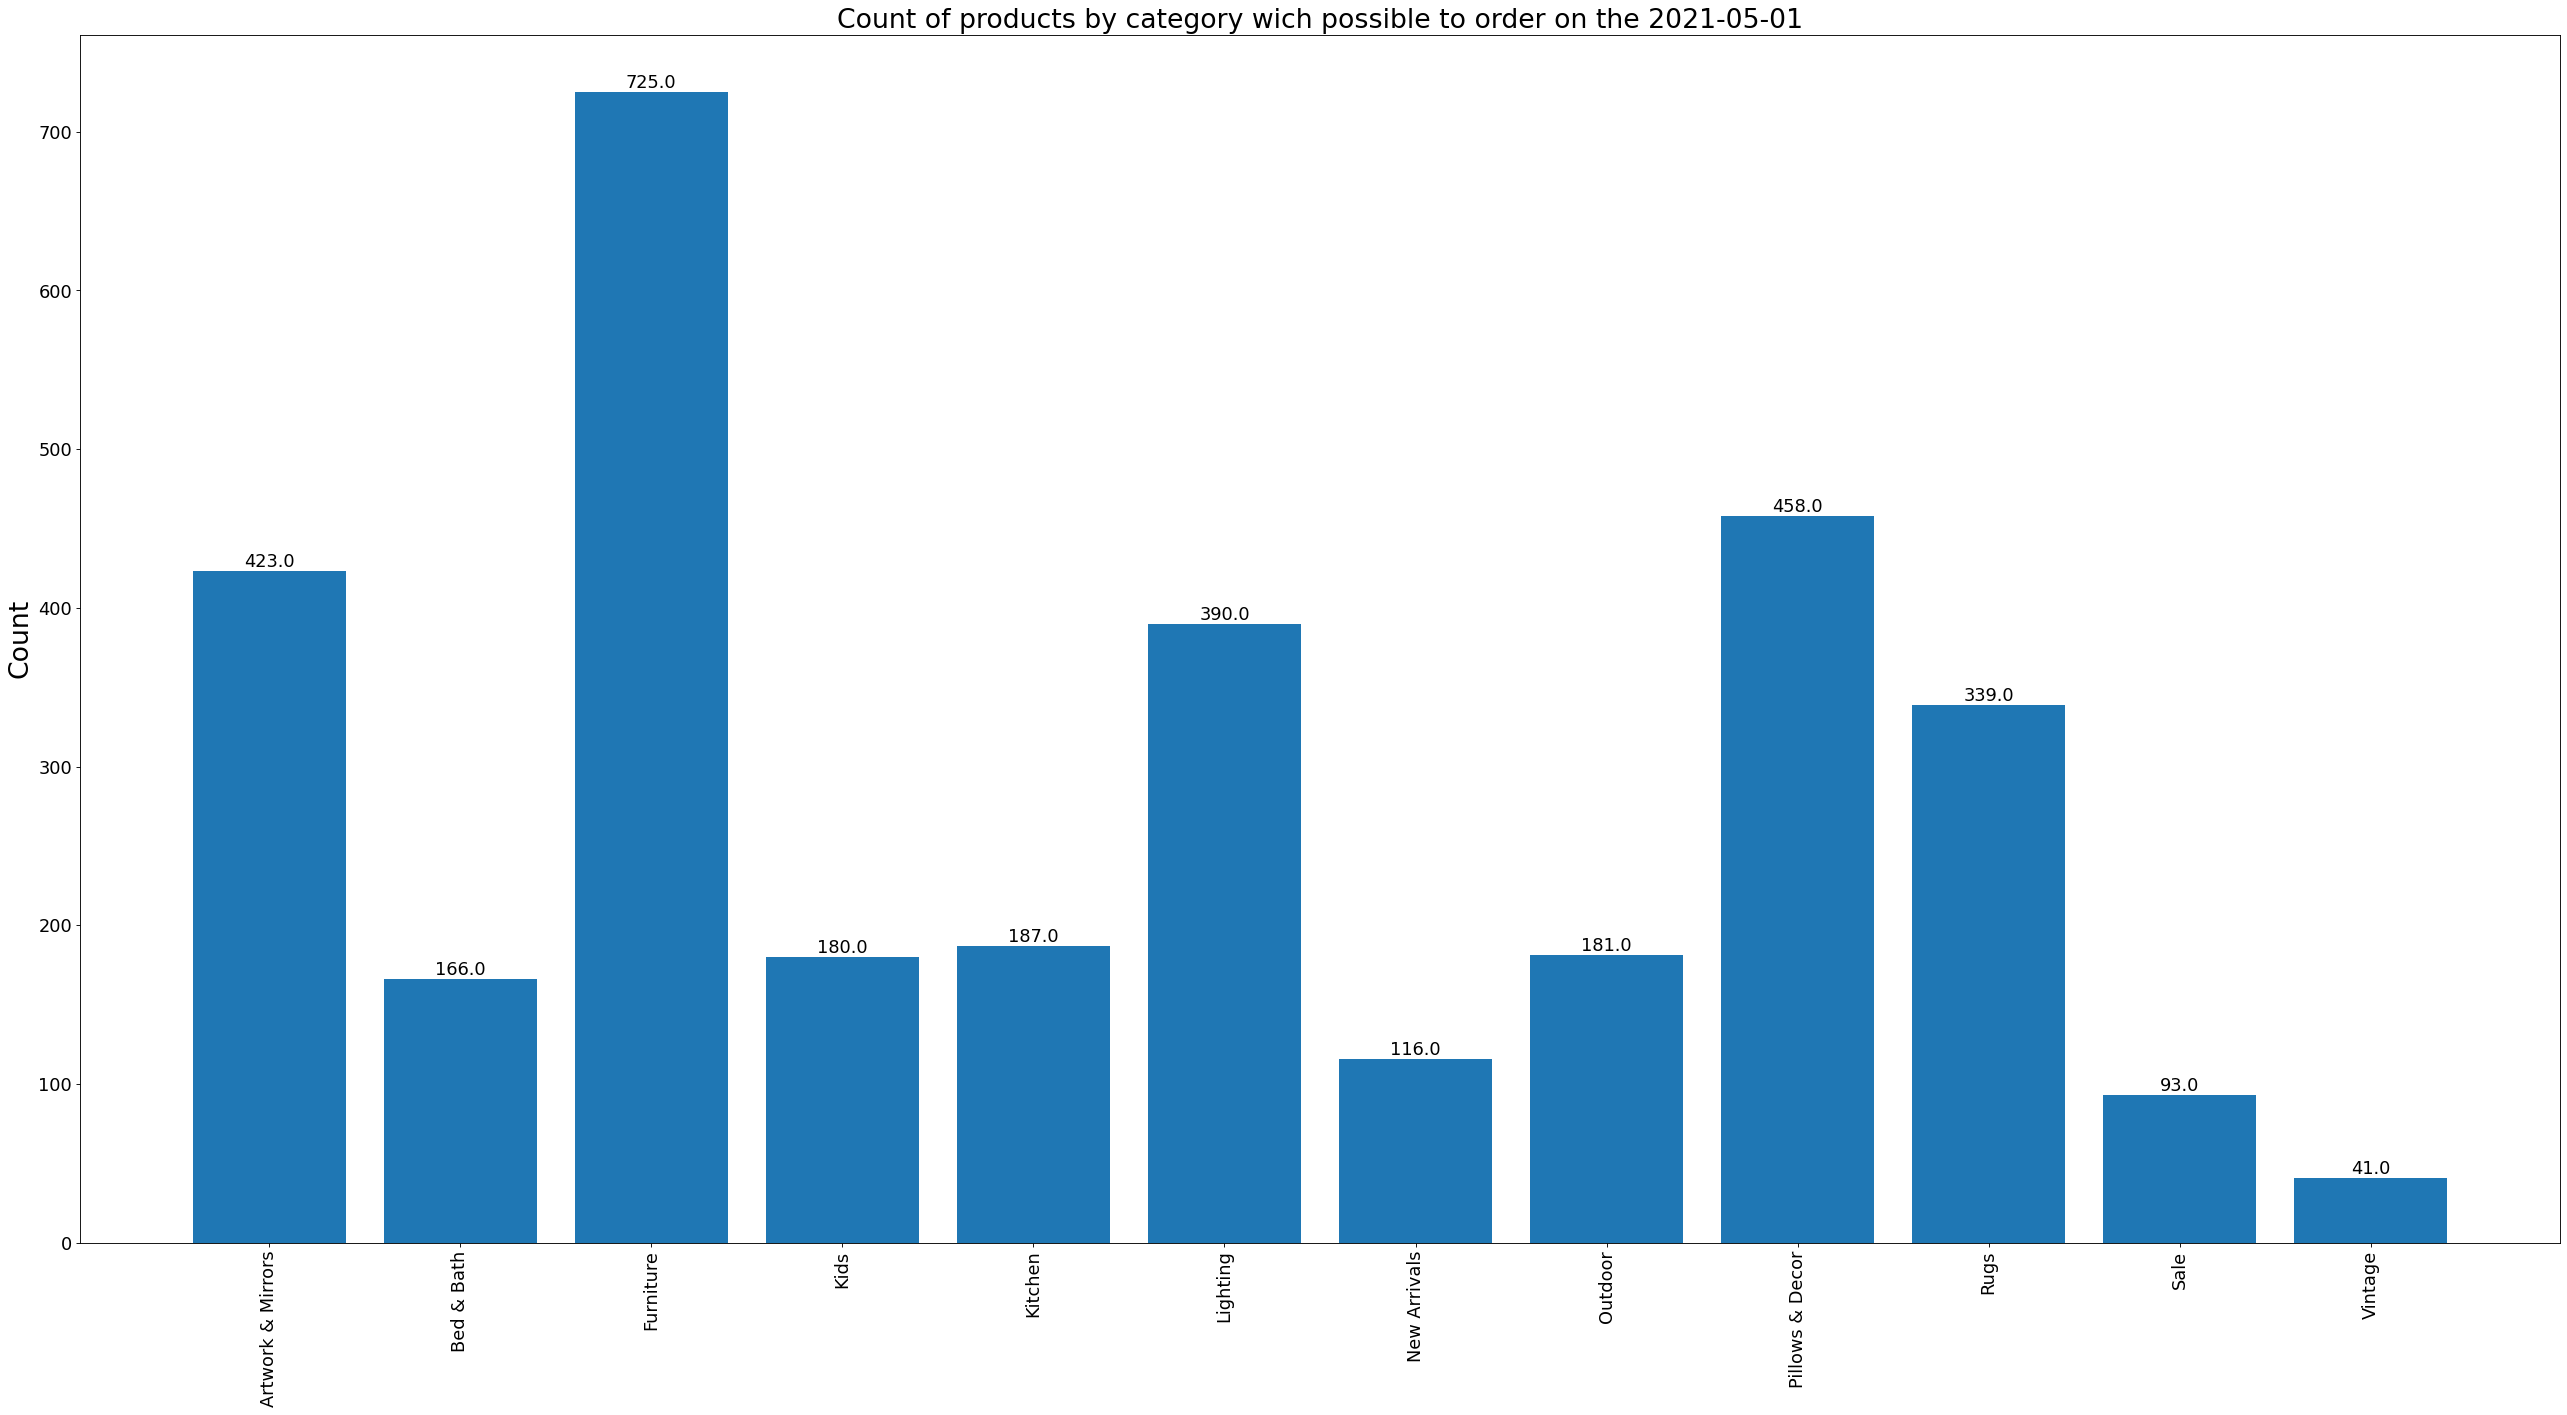

In [62]:
df = purchase_yes.groupby("category").size().reset_index(name="counts")
c = df["counts"]
plot_bar(df["category"], df["counts"])
plt.title(f"Count of products by category wich possible to order on the {date_picker}", fontsize=24)

Text(0.5, 1.0, 'Count of products by subcategory wich possible to order on the 2021-05-01')

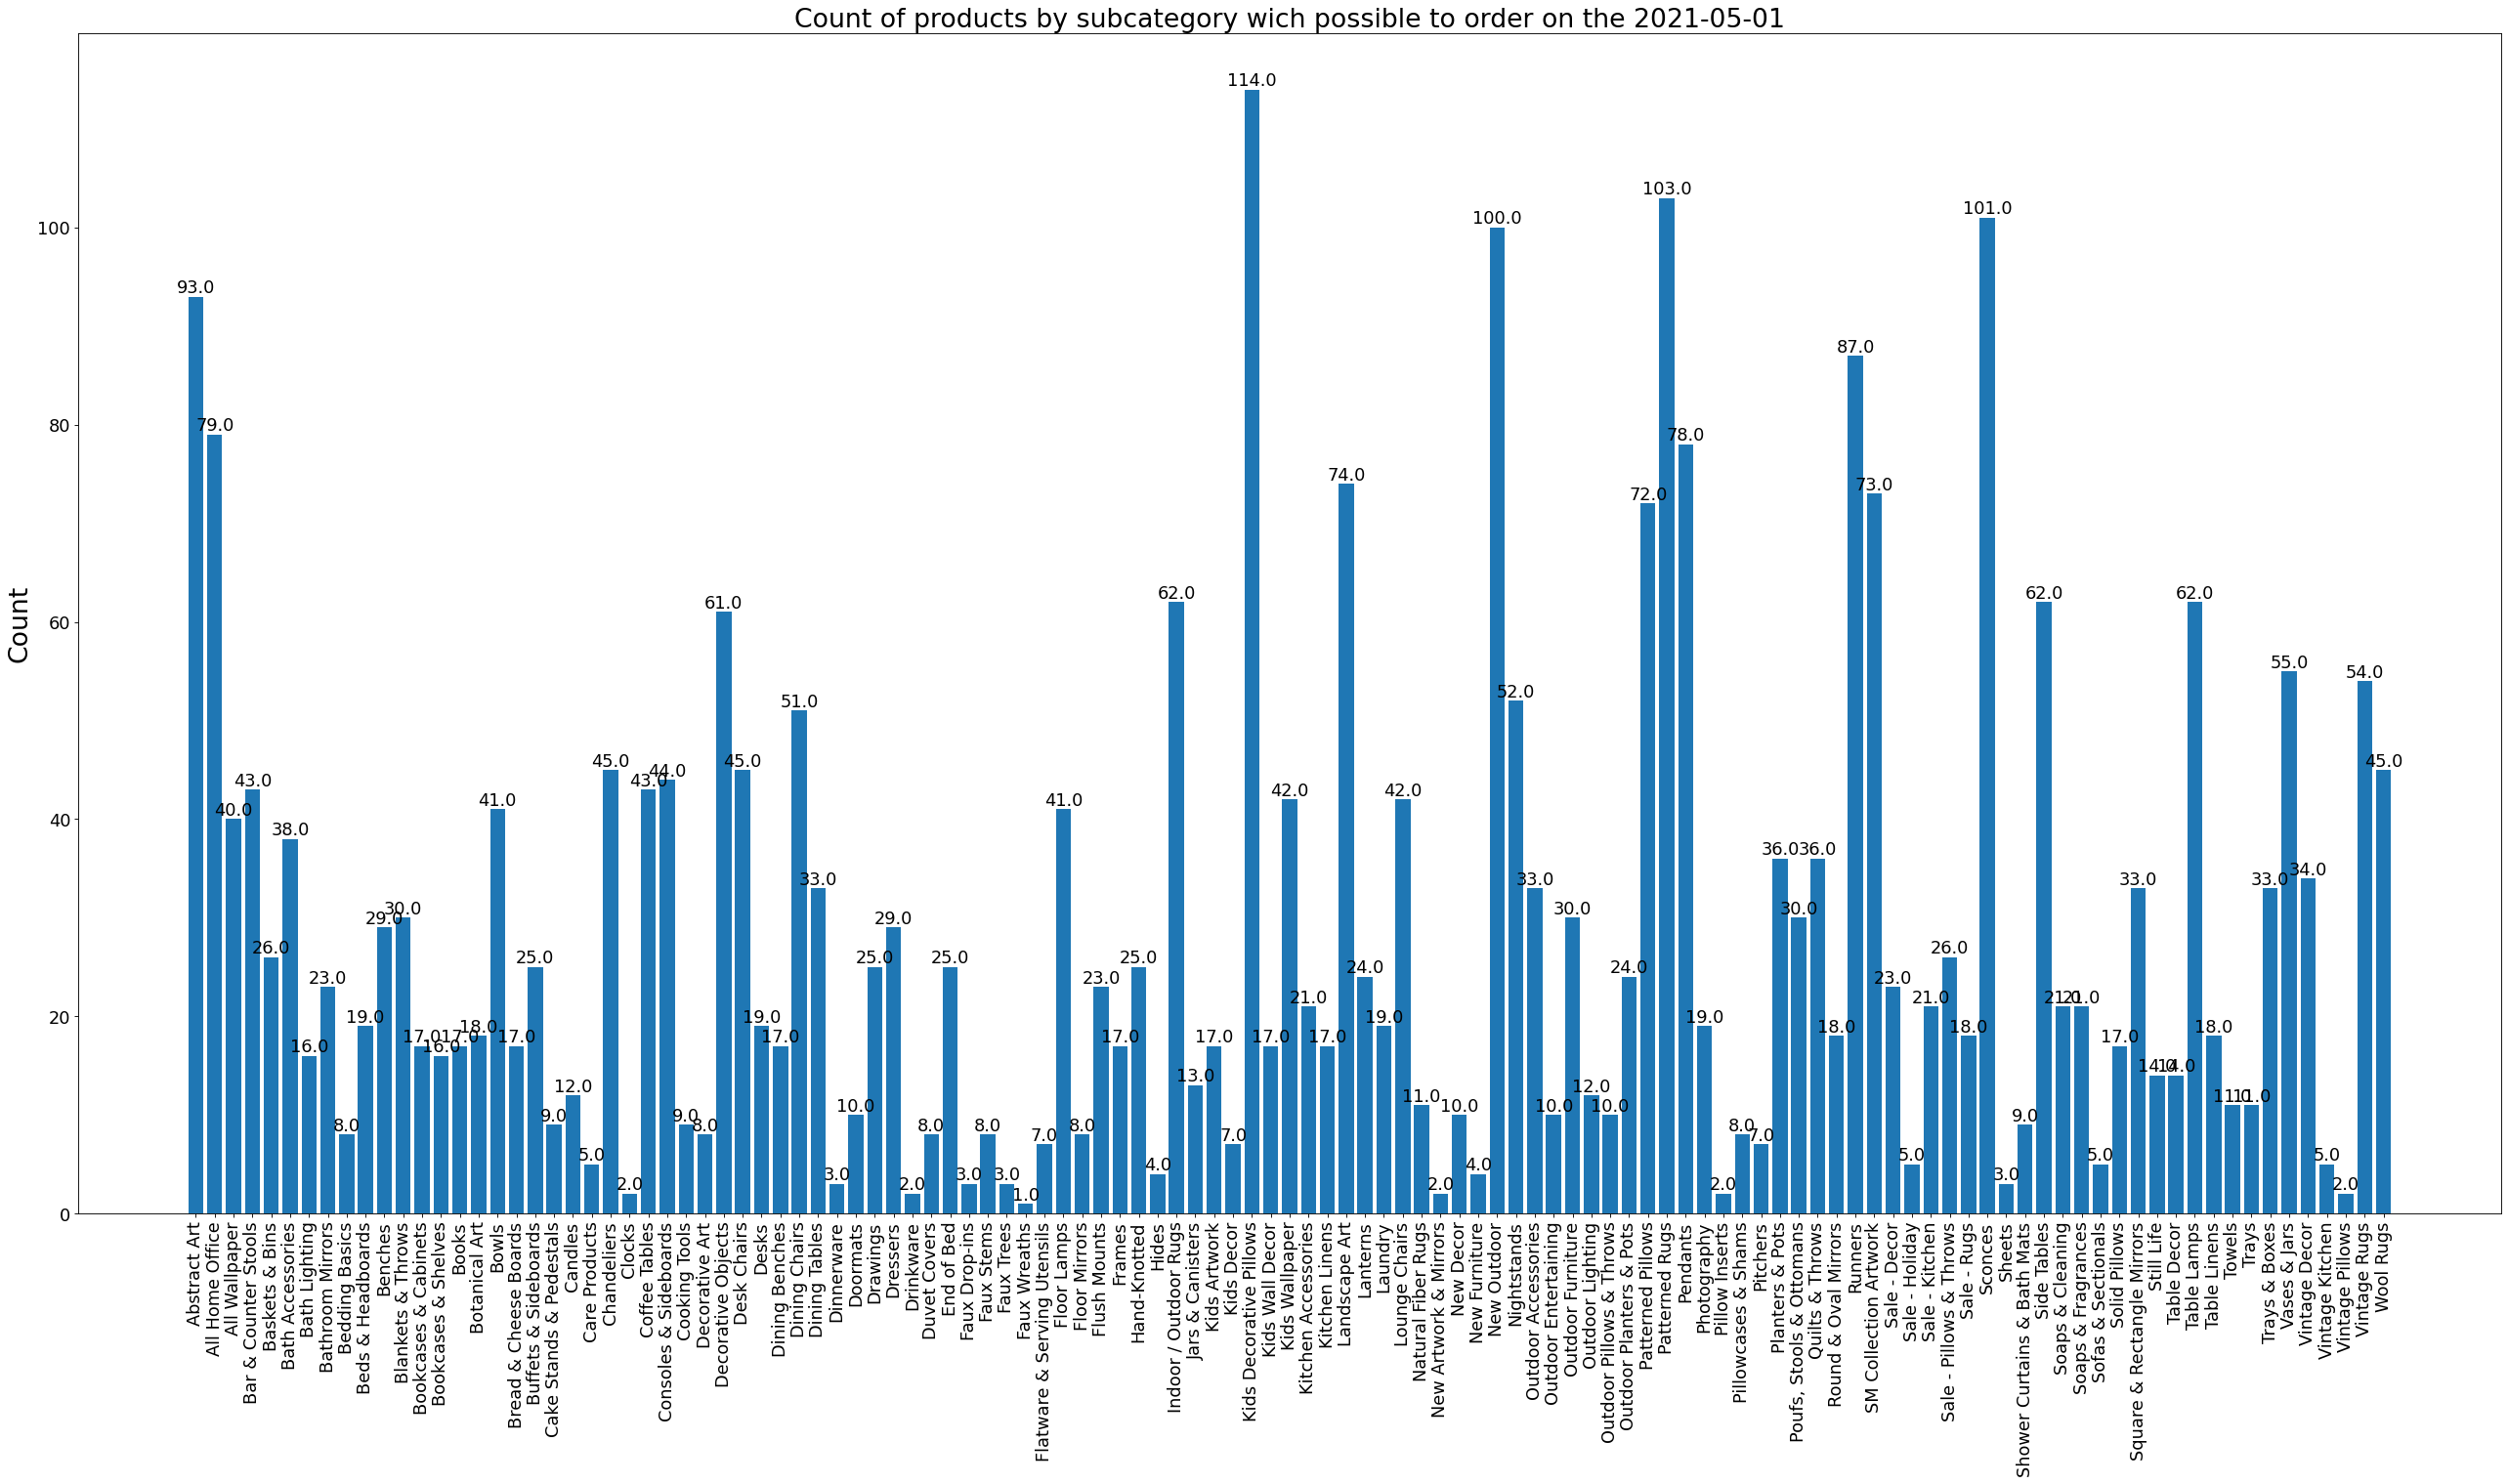

In [63]:
df = purchase_yes.groupby("subcategory").size().reset_index(name="counts")
c = df["counts"]
plot_bar(df["subcategory"], df["counts"])
plt.title(f"Count of products by subcategory wich possible to order on the {date_picker}", fontsize=24)

In [64]:
df_in_month = dataset[(dataset["created_at"] > "2021-10-31") & (dataset["created_at"] < "2021-12-01")]
purchase_not_now = df_in_month[df_in_month["purchase_opportunity"] == "No"]

Text(0.5, 1.0, "Count of products by subcategory wich was created in month and can't be bought now")

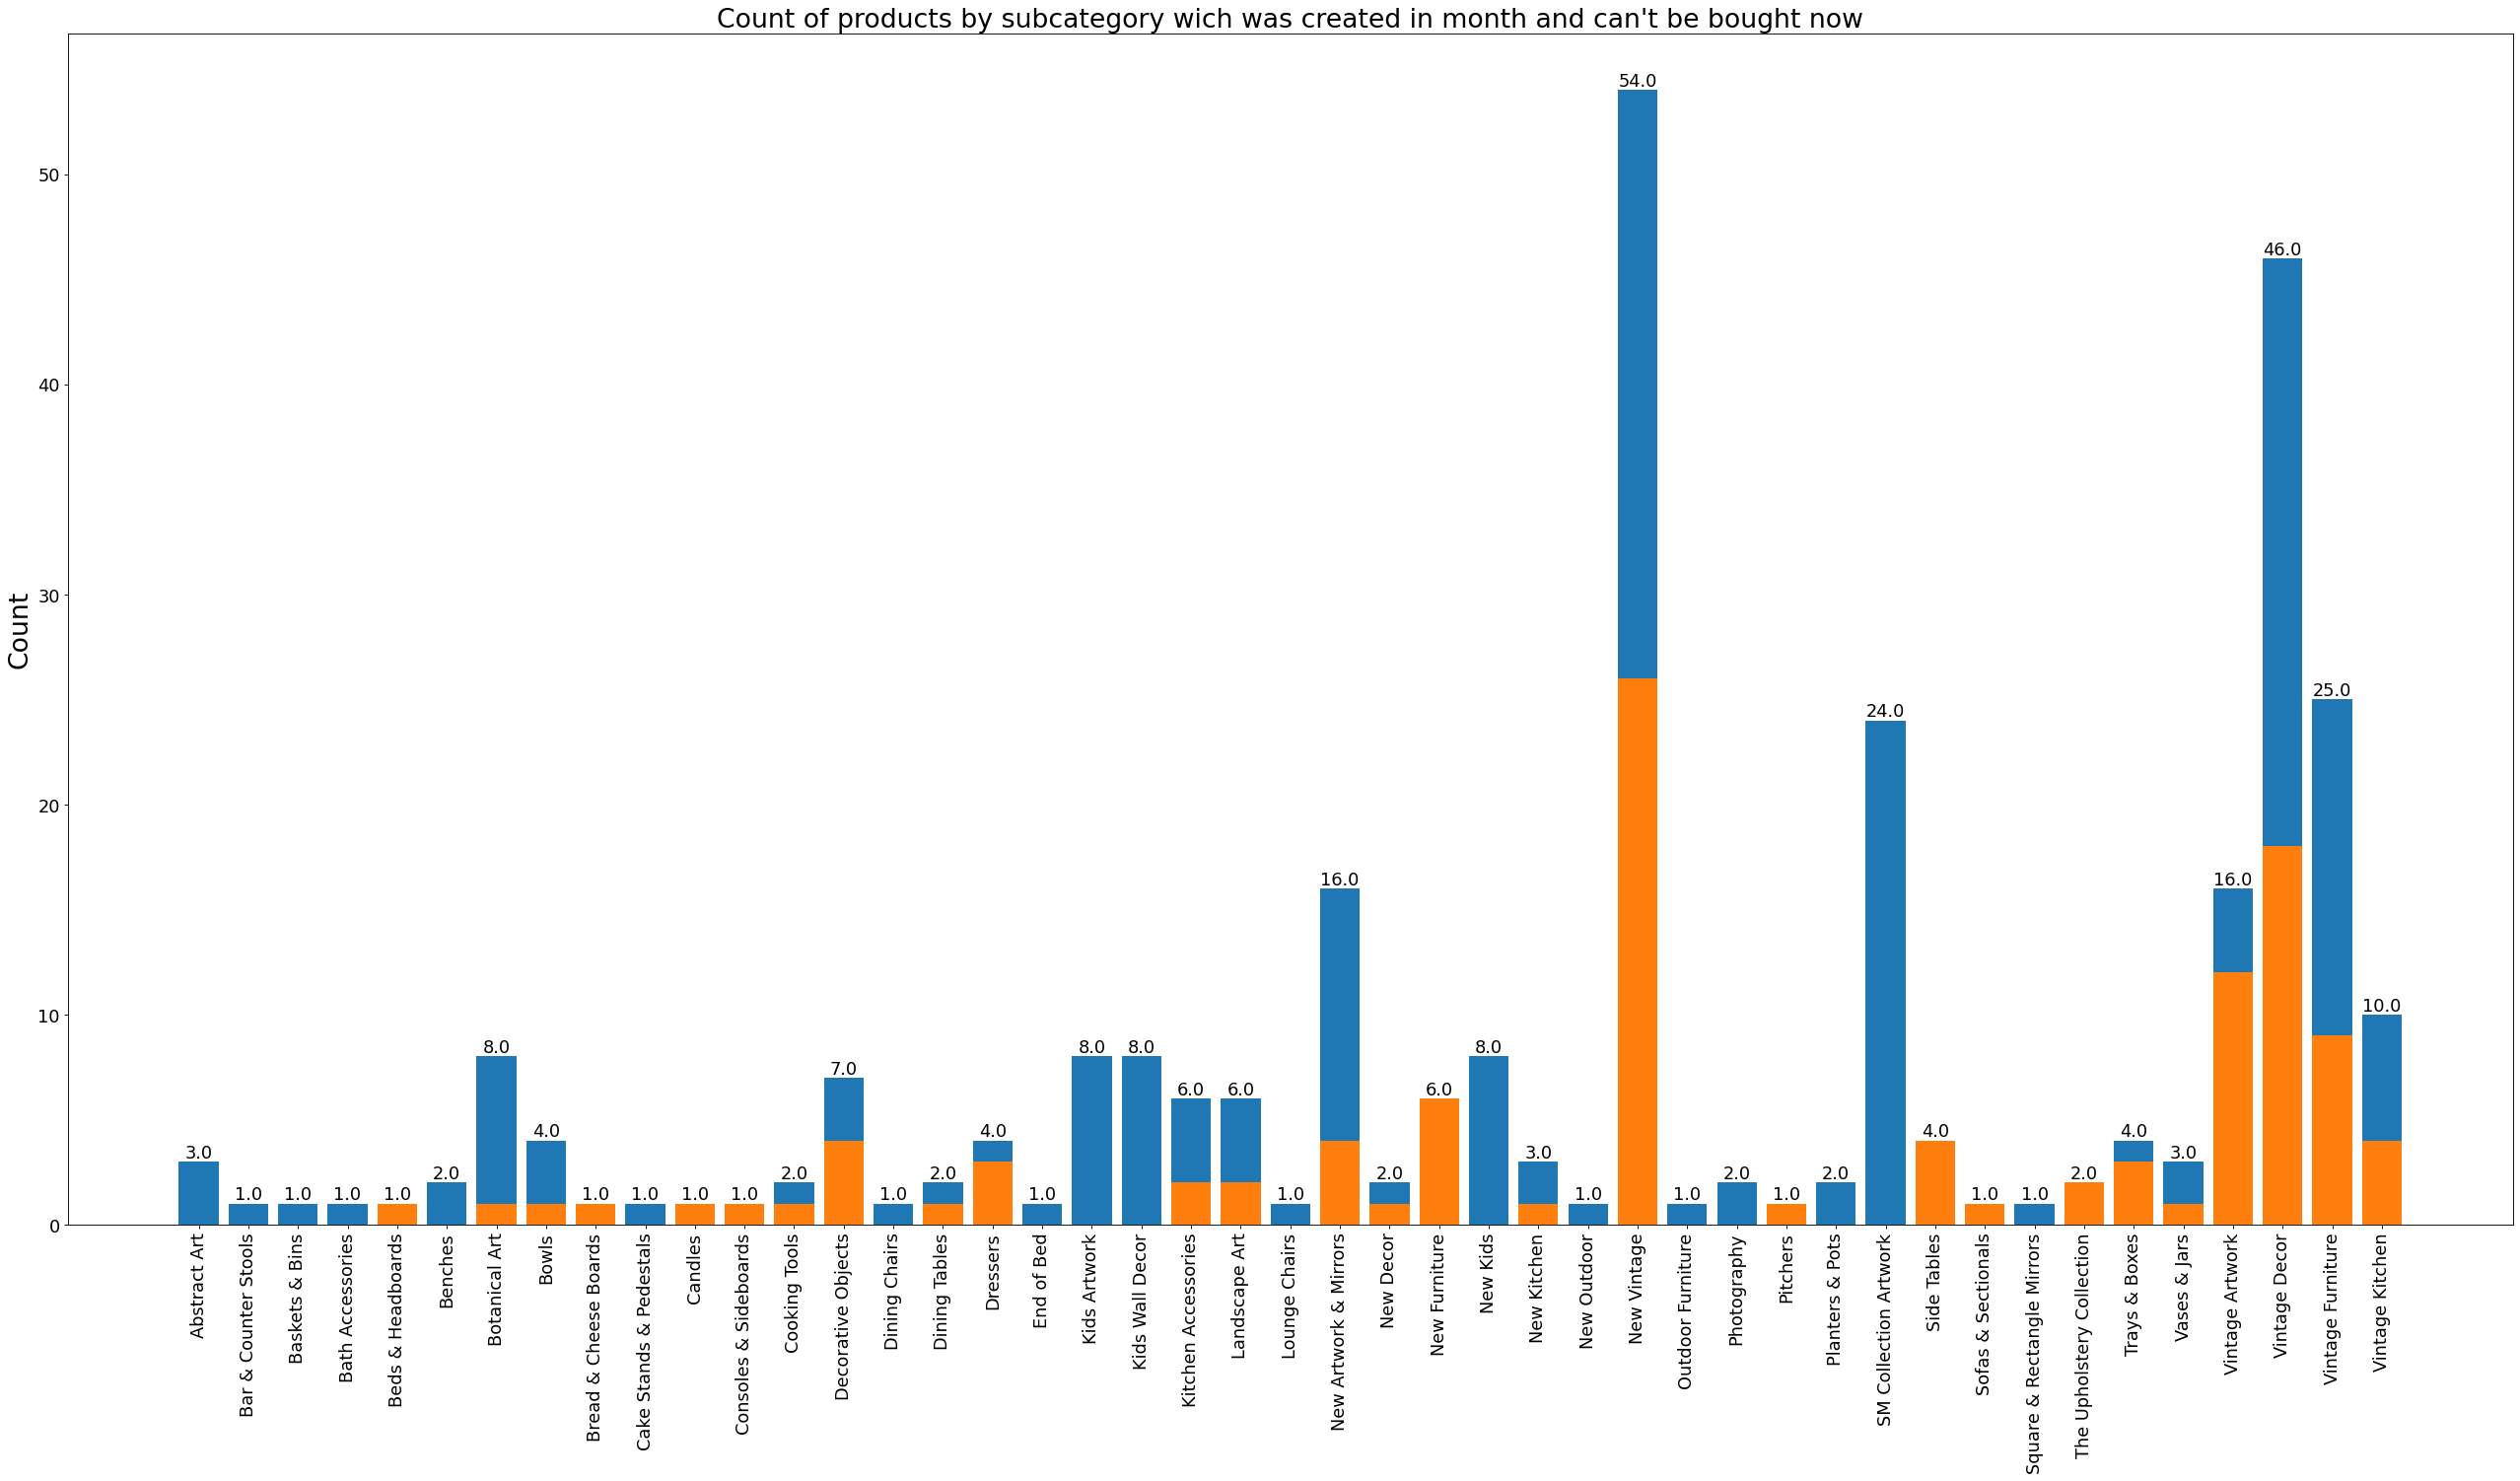

In [65]:
df = df_in_month.groupby("subcategory").size().reset_index(name="counts")
df1 = purchase_not_now.groupby("subcategory").size().reset_index(name="counts")
c = df["counts"]

plt.figure(figsize=(40,20), dpi= 80)
plt.bar(df["subcategory"], df["counts"])
plt.bar(df1["subcategory"], df1["counts"])
plt.xticks(rotation = 90, size = 16)
plt.yticks(size = 16)
for i, val in enumerate(c.values):
        plt.text(i, val, float(val), horizontalalignment='center', verticalalignment='bottom', fontdict={'size':16})
plt.ylabel("Count", fontsize=24)
plt.title(f"Count of products by subcategory wich was created in month and can't be bought now", fontsize=24)